# modelling

### import modules and configure notebook

In [1]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from functions.model_data import myModel
from functions.postproccessing import proccess_feature_importances, proccess_f1_vs_sample_size

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
%matplotlib inline

C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


### Load variables stored by data_preproccessing notebook

In [2]:
%store -r train_data_formodel
%store -r test_data
%store -r my_data
%store -r uniques
%store -r best_feats
%store -r X_test_labeled_df
%store -r site_frequencies_df


### configurations
* save_plots -> True|False
* scale -> True|False if set to True then features scaled to all have mean value 0 and standard deviation 1

In [3]:
save_plots = True
scale = False

### counts of instances in all classes before oversampling

In [4]:
train_data_formodel['class'].value_counts()

4     105
15    100
16     61
0      53
11     45
13     36
14     36
2      36
6      30
7      30
10     30
5      27
8      27
1      24
12     21
3      18
9      17
Name: class, dtype: int64

### The class column is stored as the variable y and the variables identified as best by the 2 feature_selection notebook are used as features

In [5]:
y = np.array(train_data_formodel['class'])

if scale:
    my_scaler = StandardScaler()
    X = np.array(my_scaler.fit_transform(np.array(train_data_formodel[best_feats])))
else:
    X = np.array(np.array(train_data_formodel[best_feats]))

### the dimensions of the class and features are checked

In [6]:
print(X.shape)
print(y.shape)

(696, 15)
(696,)


### Carry out 10-f0ld stratified cross validation, class f1 scores and macro f1 scores are calculated

In [7]:
my_model = myModel(X, y)

In [8]:
my_model.evaluate_rfc()

making model:
1
running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: 

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9129790304712905, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9406670557258439, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.3s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9552202173660346, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.978514178012026, total=   4.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9590370139472202, total=   4.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9129790304712905, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9406670557258439, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9555098167645975, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.978514178012026, total=   5.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9589707960904715, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9227150400525013, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9438488514772989, total=   6.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9552996013463475, total=   6.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.978514178012026, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9589707960904715, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9101789526237744, total=   4.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9436793559517663, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9589991192158375, total=   3.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9720564802230588, total=   4.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9589707960904715, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9137120453183656, total=   5.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9436793559517663, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.952718641987128, total=   5.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9689363208731931, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9589707960904715, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9137120453183656, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9436793559517663, total=   7.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9524480507452644, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9722017916309239, total=   7.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9589707960904715, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9138318434371066, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9438488514772989, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9451093818304465, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9622640955249525, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9589707960904715, total=   4.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9137120453183656, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9438488514772989, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9491677099203384, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9656271871233382, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9589707960904715, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9137120453183656, total=   7.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9438488514772989, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9491212615871149, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9656250416103568, total=   6.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9589707960904715, total=   7.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.913683532907884, total=   4.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9410261430818351, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9449585522678521, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9689363208731931, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9554639469953872, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9103370920498728, total=   5.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9409052076667821, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9449585522678521, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9689363208731931, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9592554901378431, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.910126838754971, total=   7.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9376304396861318, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9449585522678521, total=   6.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9689363208731931, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9627623392329274, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.913683532907884, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9410261430818351, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9449585522678521, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9689363208731931, total=   4.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9554639469953872, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9103370920498728, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9409052076667821, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9449585522678521, total=   4.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9689363208731931, total=   4.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9592554901378431, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.910126838754971, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9376304396861318, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9449585522678521, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9689363208731931, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9627623392329274, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.913683532907884, total=   3.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9408566117977527, total=   3.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9448734004525965, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9688905123680878, total=   3.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9589707960904715, total=   3.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.913683532907884, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9406670557258439, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9520784669833446, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9688905123680878, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9589707960904715, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.913683532907884, total=   6.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9408566117977527, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9520784669833446, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9656250416103568, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9589707960904715, total=   6.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9067900488953121, total=   4.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9376914897471819, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9349514073306513, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9623373647932683, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.949068379950733, total=   4.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9068142862147242, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.934093338571176, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9349514073306513, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9623373647932683, total=   4.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9563282987731204, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9068142862147242, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9376304396861318, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9349514073306513, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9623373647932683, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9563282987731204, total=   5.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9067900488953121, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9376914897471819, total=   3.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9349514073306513, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9623373647932683, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.949068379950733, total=   3.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9068142862147242, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.934093338571176, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9349514073306513, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9623373647932683, total=   4.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9563282987731204, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9068142862147242, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9376304396861318, total=   5.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9349514073306513, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9623373647932683, total=   5.7s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9563282987731204, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9067900488953121, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9376914897471819, total=   3.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9349514073306513, total=   3.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9623373647932683, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.949068379950733, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9068142862147242, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.934093338571176, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9349514073306513, total=   4.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9623373647932683, total=   4.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9563282987731204, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9068142862147242, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9376304396861318, total=   5.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9349514073306513, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9623373647932683, total=   5.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9563282987731204, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8922084640766208, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9188782993905344, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9317059613607471, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9592916587895066, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9386485429055089, total=   3.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8922084640766208, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9188782993905344, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9347926393700258, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9592916587895066, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9426060102984413, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8922281670375003, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9188782993905344, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9347926393700258, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9557093841090714, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.942388662435102, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8922084640766208, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9188782993905344, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9317059613607471, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9592916587895066, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9386485429055089, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8922084640766208, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9188782993905344, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9347926393700258, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9592916587895066, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9426060102984413, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8922281670375003, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9188782993905344, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9347926393700258, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9557093841090714, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.942388662435102, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8922084640766208, total=   4.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9188782993905344, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9317059613607471, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9592916587895066, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9386485429055089, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8922084640766208, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9188782993905344, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9347926393700258, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9592916587895066, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9426060102984413, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8922281670375003, total=   6.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9188782993905344, total=   6.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9347926393700258, total=   6.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9557093841090714, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.942388662435102, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9504292512738706, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9564188979596009, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9814134210419041, total=   5.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.98774206510369, total=   5.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9727744029152197, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9504292512738706, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9564188979596009, total=   6.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9845158328130464, total=   6.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.98774206510369, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9727744029152197, total=   7.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9504292512738706, total=   7.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9564188979596009, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9814134210419041, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.98774206510369, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9727744029152197, total=   6.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9474232043400661, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9564188979596009, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9845158328130464, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9846350047210879, total=   4.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9627623392329274, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9474232043400661, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9564188979596009, total=   5.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9814094518428883, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9846350047210879, total=   5.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9627623392329274, total=   5.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9474232043400661, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9564188979596009, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9783070400717458, total=   6.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9846350047210879, total=   6.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9627623392329274, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9326813723098555, total=   4.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9535298421293686, total=   4.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9719911391360457, total=   4.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9846350047210879, total=   4.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9627623392329274, total=   4.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9354146485725434, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9535298421293686, total=   5.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9719911391360457, total=   5.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9846350047210879, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9627623392329274, total=   5.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9295997720146327, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9535298421293686, total=   6.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9719911391360457, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9846350047210879, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9627623392329274, total=   6.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.935424896574183, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9563781780668837, total=   4.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.975303766325438, total=   4.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9846350047210879, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9627623392329274, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.935424896574183, total=   5.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9564188979596009, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.975303766325438, total=   8.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9846350047210879, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9627623392329274, total=   6.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9322807571920312, total=   7.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9564188979596009, total=   8.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9722013545542957, total=   7.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9846350047210879, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9627623392329274, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.935424896574183, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9563781780668837, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.975303766325438, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9846350047210879, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9627623392329274, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.935424896574183, total=   6.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9564188979596009, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.975303766325438, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9846350047210879, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9627623392329274, total=   6.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9322807571920312, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9564188979596009, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9722013545542957, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9846350047210879, total=   7.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9627623392329274, total=   7.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9265422984112764, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9503480463779134, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.965343486822759, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.978514178012026, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9627623392329274, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9265422984112764, total=   6.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9503480463779134, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.965343486822759, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.978514178012026, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9627623392329274, total=   6.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.92666073761185, total=   7.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9535087376077733, total=   7.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.965343486822759, total=   7.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9752318394355697, total=   8.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9627623392329274, total=   8.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.913327427765244, total=   6.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9439489754164321, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9485301783308278, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9752318394355697, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9592554901378431, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.913327427765244, total=   7.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9439489754164321, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9517605761810247, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9752318394355697, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9592554901378431, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.91961532831402, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9439489754164321, total=   7.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9517605761810247, total=   7.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9752318394355697, total=   7.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9627623392329274, total=   7.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.913327427765244, total=   5.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9439489754164321, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9485301783308278, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9752318394355697, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9592554901378431, total=   4.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.913327427765244, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9439489754164321, total=   7.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9517605761810247, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9752318394355697, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9592554901378431, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.91961532831402, total=   7.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9439489754164321, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9517605761810247, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9752318394355697, total=   7.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9627623392329274, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.913327427765244, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9439489754164321, total=   5.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9485301783308278, total=   5.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9752318394355697, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9592554901378431, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.913327427765244, total=   8.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9439489754164321, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9517605761810247, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9752318394355697, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9592554901378431, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.91961532831402, total=   8.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9439489754164321, total=   8.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9517605761810247, total=  11.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9752318394355697, total=   9.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9627623392329274, total=   9.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8985375068966401, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9283445930937836, total=   4.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9412932702699908, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9625918248755617, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9527539421502269, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9025536313759939, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9282422521245695, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9380206478023219, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9625918248755617, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9464753735202154, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8985375068966401, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9250289888493868, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9380206478023219, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9625918248755617, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9498167348786545, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8985375068966401, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9283445930937836, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9412932702699908, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9625918248755617, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9527539421502269, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9025536313759939, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9282422521245695, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9380206478023219, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9625918248755617, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9464753735202154, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8985375068966401, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9250289888493868, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9380206478023219, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9625918248755617, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9498167348786545, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8985375068966401, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9283445930937836, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9412932702699908, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9625918248755617, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9527539421502269, total=   4.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9025536313759939, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9282422521245695, total=   5.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9380206478023219, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9625918248755617, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9464753735202154, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8985375068966401, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9250289888493868, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9380206478023219, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9625918248755617, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9498167348786545, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9566279168333083, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.96261196783737, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9814134210419041, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9906927289280231, total=   5.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9727744029152197, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9533686040584247, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.96261196783737, total=   6.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9814134210419041, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9906927289280231, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9727744029152197, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9533686040584247, total=   7.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9594354892114862, total=   7.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9814134210419041, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.98774206510369, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9727744029152197, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9474232043400661, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9563781780668837, total=   5.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9814134210419041, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9846350047210879, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9657979540332482, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9474232043400661, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9563781780668837, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9814134210419041, total=   6.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9846350047210879, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9657979540332482, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9474232043400661, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9563781780668837, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9814134210419041, total=   8.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9846350047210879, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9695039055270754, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9385026854067102, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9566095358833808, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9751775834989607, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9846350047210879, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9627623392329274, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9385026854067102, total=   6.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9566095358833808, total=   6.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9722013545542957, total=   6.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9846350047210879, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9627623392329274, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9354146485725434, total=   8.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9566095358833808, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9783070400717458, total=   7.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9846350047210879, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9627623392329274, total=   7.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9352420946006458, total=   5.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9563781780668837, total=   5.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.975303766325438, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9846350047210879, total=   5.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9592554901378431, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9352420946006458, total=   6.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9563781780668837, total=   6.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.975303766325438, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9846350047210879, total=   6.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9627623392329274, total=   6.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9383316332938997, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9564188979596009, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.975303766325438, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9846350047210879, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9627623392329274, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9352420946006458, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9563781780668837, total=   5.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.975303766325438, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9846350047210879, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9592554901378431, total=   4.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9352420946006458, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9563781780668837, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.975303766325438, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9846350047210879, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9627623392329274, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9383316332938997, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9564188979596009, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.975303766325438, total=   7.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9846350047210879, total=  10.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9627623392329274, total=   9.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9352642769870961, total=   5.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9506429113786607, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9685109178539669, total=   5.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9752318394355697, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9627623392329274, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9352642769870961, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9535298421293686, total=   6.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9685109178539669, total=   6.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9752318394355697, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9627623392329274, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9353827161876698, total=   7.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9535087376077733, total=   7.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9685109178539669, total=   7.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9782545453994522, total=   8.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9627623392329274, total=   7.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.913327427765244, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9472030034382621, total=   5.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9517605761810247, total=   4.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.978514178012026, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9627623392329274, total=   4.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.91961532831402, total=   5.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.950326941856318, total=   6.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9517605761810247, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9752318394355697, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9592554901378431, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.91961532831402, total=   7.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9470636166115687, total=   7.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9517605761810247, total=   8.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9752318394355697, total=   8.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9627623392329274, total=   9.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.913327427765244, total=   5.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9472030034382621, total=   5.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9517605761810247, total=   4.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.978514178012026, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9627623392329274, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.91961532831402, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.950326941856318, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9517605761810247, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9752318394355697, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9592554901378431, total=   6.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.91961532831402, total=   7.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9470636166115687, total=   7.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9517605761810247, total=   7.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9752318394355697, total=   7.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9627623392329274, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.913327427765244, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9472030034382621, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9517605761810247, total=   5.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.978514178012026, total=   5.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9627623392329274, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.91961532831402, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.950326941856318, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9517605761810247, total=   6.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9752318394355697, total=   6.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9592554901378431, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.91961532831402, total=   7.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9470636166115687, total=   7.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9517605761810247, total=   7.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9752318394355697, total=   7.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9627623392329274, total=   7.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8986815423347931, total=   4.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9282422521245695, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9412932702699908, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9625918248755617, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9527539421502269, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9055892461763146, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9282422521245695, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9380206478023219, total=   5.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9625918248755617, total=   5.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9464753735202154, total=   5.7s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8986815423347931, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9253306479745753, total=   7.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9380206478023219, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9625918248755617, total=   6.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9498167348786545, total=   5.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8986815423347931, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9282422521245695, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9412932702699908, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9625918248755617, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9527539421502269, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9055892461763146, total=   5.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9282422521245695, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9380206478023219, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9625918248755617, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9464753735202154, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8986815423347931, total=   7.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9253306479745753, total=   6.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9380206478023219, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9625918248755617, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9498167348786545, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8986815423347931, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9282422521245695, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9412932702699908, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9625918248755617, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9527539421502269, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9055892461763146, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9282422521245695, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9380206478023219, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9625918248755617, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9464753735202154, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8986815423347931, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9253306479745753, total=   6.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9380206478023219, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9625918248755617, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9498167348786545, total=   6.2s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 56.2min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


making model:
2
running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: 

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9377726984421131, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9473951837728928, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9403554032037005, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9813649784238019, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9493808462848712, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9407824209955525, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9443357895370279, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9403554032037005, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9813649784238019, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9493808462848712, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9440626140590274, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9473951837728928, total=   7.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9403554032037005, total=   7.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9813649784238019, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9493808462848712, total=   7.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9345140218088235, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.944582165944395, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9437584524271831, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9782690031916038, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9430429928107948, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.934460477986303, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.944582165944395, total=   6.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9405895297536164, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9782690031916038, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9430429928107948, total=   7.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.934460477986303, total=   8.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.944582165944395, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9405895297536164, total=   7.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9782690031916038, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9430429928107948, total=   7.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9312783246493509, total=   4.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9445699467371294, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9338757202976257, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9812917091554861, total=   4.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9430429928107948, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9279441974762144, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9444909203423135, total=   5.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9338757202976257, total=   5.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9782690031916038, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9430429928107948, total=   5.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9279441974762144, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9445699467371294, total=   6.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9336494759537343, total=   6.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9782690031916038, total=   6.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9430429928107948, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9314710395592749, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9383410219323532, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.937132887559528, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9812917091554861, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9427614968936252, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9312783246493509, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9385996175469861, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.937132887559528, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9812917091554861, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.946195756132838, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9312783246493509, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9383532411396189, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.937132887559528, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9812917091554861, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9427614968936252, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9314710395592749, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9383410219323532, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.937132887559528, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9812917091554861, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9427614968936252, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9312783246493509, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9385996175469861, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.937132887559528, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9812917091554861, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.946195756132838, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9312783246493509, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9383532411396189, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.937132887559528, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9812917091554861, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9427614968936252, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9281369123861384, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9413048335648955, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9338757202976257, total=   3.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9782690031916038, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9427614968936252, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9279441974762144, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9415512099722626, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9338757202976257, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9782690031916038, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9392011917853323, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9246565206591257, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9415512099722626, total=   7.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9338757202976257, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9782690031916038, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9427614968936252, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.921971185273496, total=   4.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9351279016913692, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9265178406045278, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9782690031916038, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.935709000864299, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9127814894342493, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9351279016913692, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9265178406045278, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9782690031916038, total=   5.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.935709000864299, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9187822378121027, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9351279016913692, total=   6.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9265178406045278, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9782690031916038, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9392011917853323, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.921971185273496, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9351279016913692, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9265178406045278, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9782690031916038, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.935709000864299, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9127814894342493, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9351279016913692, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9265178406045278, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9782690031916038, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.935709000864299, total=   5.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9187822378121027, total=   6.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9351279016913692, total=   6.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9265178406045278, total=   7.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9782690031916038, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9392011917853323, total=   7.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.921971185273496, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9351279016913692, total=   4.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9265178406045278, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9782690031916038, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.935709000864299, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9127814894342493, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9351279016913692, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9265178406045278, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9782690031916038, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.935709000864299, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9187822378121027, total=   7.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9351279016913692, total=   7.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9265178406045278, total=   7.7s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9782690031916038, total=   7.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9392011917853323, total=   8.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9064487859813692, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9156441020386901, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9237669353768425, total=   4.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9717841884022907, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9186527188327687, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8997009730529326, total=   6.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9127630287128534, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9205980127032759, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9717841884022907, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9185147888979865, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8997009730529326, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9127630287128534, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9237669353768425, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9683590668110793, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9183156374491181, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9064487859813692, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9156441020386901, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9237669353768425, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9717841884022907, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9186527188327687, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8997009730529326, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9127630287128534, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9205980127032759, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9717841884022907, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9185147888979865, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8997009730529326, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9127630287128534, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9237669353768425, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9683590668110793, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9183156374491181, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9064487859813692, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9156441020386901, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9237669353768425, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9717841884022907, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9186527188327687, total=   4.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8997009730529326, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9127630287128534, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9205980127032759, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9717841884022907, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9185147888979865, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8997009730529326, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9127630287128534, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9237669353768425, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9683590668110793, total=   6.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9183156374491181, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9594334354018715, total=   5.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9566909814587833, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9595548990285833, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9843876843876844, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9691278603316483, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9561532423383966, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9566909814587833, total=   6.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9627366947800385, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9843876843876844, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9691278603316483, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9594334354018715, total=   8.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9566909814587833, total=   7.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9627366947800385, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9843876843876844, total=   7.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9691278603316483, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9595682360388241, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.950663157629102, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9595548990285833, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9843876843876844, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9628296865412146, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9594334354018715, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9472798982086907, total=   5.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9561102779369034, total=   5.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9843876843876844, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9628296865412146, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9594334354018715, total=   9.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.950663157629102, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9595548990285833, total=   8.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9843876843876844, total=   7.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9628296865412146, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.953650567854298, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9475564548319968, total=   5.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9465949573931148, total=   7.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9628296865412146, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9472593452092056, total=   5.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9475564548319968, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9494598006981908, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9628296865412146, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9472593452092056, total=   7.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9475564548319968, total=   8.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.952835509956253, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   7.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9628296865412146, total=   8.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9374877322632741, total=   5.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9503442986415122, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9529808213641182, total=   5.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9843876843876844, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9628296865412146, total=   4.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9407176921646832, total=   6.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9473951837728928, total=   6.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9529808213641182, total=   6.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9843876843876844, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9628296865412146, total=   7.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9407176921646832, total=   8.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9473951837728928, total=   8.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.949605112106056, total=   7.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9843876843876844, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9628296865412146, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9374877322632741, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9503442986415122, total=   4.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9529808213641182, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9843876843876844, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9628296865412146, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9407176921646832, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9473951837728928, total=   6.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9529808213641182, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9843876843876844, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9628296865412146, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9407176921646832, total=   7.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9473951837728928, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.949605112106056, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9843876843876844, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9628296865412146, total=   7.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9407033274444361, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9443438045605229, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.943655604608561, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9628296865412146, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9407033274444361, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9412575250036551, total=   6.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9470291683536418, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9628296865412146, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9407033274444361, total=   7.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9444371752421288, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9440461901384654, total=   9.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   8.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9628296865412146, total=   8.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9284622374415096, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9412697442109208, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9337267144210656, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9785469697234402, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9527528775206794, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9284766021617566, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9412575250036551, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9338575458590027, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9785469697234402, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9561464136040715, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9315557325005713, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9443315853532572, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9338575458590027, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9784121690864876, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9561464136040715, total=   7.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9284622374415096, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9412697442109208, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9337267144210656, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9785469697234402, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9527528775206794, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9284766021617566, total=   6.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9412575250036551, total=   7.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9338575458590027, total=   8.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9785469697234402, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9561464136040715, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9315557325005713, total=   7.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9443315853532572, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9338575458590027, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9784121690864876, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9561464136040715, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9284622374415096, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9412697442109208, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9337267144210656, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9785469697234402, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9527528775206794, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9284766021617566, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9412575250036551, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9338575458590027, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9785469697234402, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9561464136040715, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9315557325005713, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9443315853532572, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9338575458590027, total=   8.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9784121690864876, total=   8.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9561464136040715, total=   7.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9159963376728839, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9193490453721163, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.920855373281754, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9718574576706064, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9218386616085502, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9128009536725462, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9193490453721163, total=   5.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9208618098206982, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9718574576706064, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9183316377067341, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9193720469309461, total=   6.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9193490453721163, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9208618098206982, total=   6.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9718574576706064, total=   6.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9220409627348254, total=   6.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9159963376728839, total=   4.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9193490453721163, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.920855373281754, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9718574576706064, total=   4.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9218386616085502, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9128009536725462, total=   5.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9193490453721163, total=   5.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9208618098206982, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9718574576706064, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9183316377067341, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9193720469309461, total=   7.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9193490453721163, total=   6.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9208618098206982, total=   7.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9718574576706064, total=   7.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9220409627348254, total=   6.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9159963376728839, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9193490453721163, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.920855373281754, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9718574576706064, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9218386616085502, total=   7.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9128009536725462, total=   7.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9193490453721163, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9208618098206982, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9718574576706064, total=   5.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9183316377067341, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9193720469309461, total=   6.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9193490453721163, total=   6.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9208618098206982, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9718574576706064, total=   5.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9220409627348254, total=   6.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9594334354018715, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9536598762227396, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9658964519268075, total=   5.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.987485805132864, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9691278603316483, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9561532423383966, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9567558514549378, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9689329362703977, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.987485805132864, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9691278603316483, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9594334354018715, total=   8.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9567558514549378, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9689329362703977, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.987485805132864, total=   7.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9691278603316483, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.962858556993083, total=   5.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9537418665901638, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9627452768319642, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.987485805132864, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9628296865412146, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9594334354018715, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.950663157629102, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9561102779369034, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.987485805132864, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9628296865412146, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9594334354018715, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.950663157629102, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9561102779369034, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.987485805132864, total=   6.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9628296865412146, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9570057928189416, total=   4.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9504692441224949, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.956463572407845, total=   4.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9843876843876844, total=   4.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9628296865412146, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9570057928189416, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9473951837728928, total=   5.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9498232097303304, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9843876843876844, total=   5.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9628296865412146, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9570057928189416, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9504692441224949, total=   6.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9531888044271947, total=   6.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9843876843876844, total=   6.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9628296865412146, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9405843971246448, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9503442986415122, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.949605112106056, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.98143487505037, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9628296865412146, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9407033274444361, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.950663157629102, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.949605112106056, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9843876843876844, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9628296865412146, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9407033274444361, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.950663157629102, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9494598006981908, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9843876843876844, total=   8.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9628296865412146, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9405843971246448, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9503442986415122, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.949605112106056, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.98143487505037, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9628296865412146, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9407033274444361, total=   6.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.950663157629102, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.949605112106056, total=   6.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9843876843876844, total=   6.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9628296865412146, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9407033274444361, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.950663157629102, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9494598006981908, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9843876843876844, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9628296865412146, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9407033274444361, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9443315853532572, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9465949573931148, total=   5.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9628296865412146, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9407033274444361, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9443315853532572, total=   6.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9499685211381956, total=   6.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9628296865412146, total=   7.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9407033274444361, total=   7.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9443315853532572, total=   7.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9470291683536418, total=   7.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   7.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9628296865412146, total=   7.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9284766021617566, total=   4.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9412697442109208, total=   4.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9371870692746094, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9785469697234402, total=   5.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9527528775206794, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.928483609342365, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9412575250036551, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9338575458590027, total=   5.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9785469697234402, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9527528775206794, total=   5.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9315413677803244, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9412575250036551, total=   7.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9338575458590027, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9784121690864876, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9561464136040715, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9284766021617566, total=   4.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9412697442109208, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9371870692746094, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9785469697234402, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9527528775206794, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.928483609342365, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9412575250036551, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9338575458590027, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9785469697234402, total=   6.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9527528775206794, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9315413677803244, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9412575250036551, total=   7.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9338575458590027, total=   7.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9784121690864876, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9561464136040715, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9284766021617566, total=   4.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9412697442109208, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9371870692746094, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9785469697234402, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9527528775206794, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.928483609342365, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9412575250036551, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9338575458590027, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9785469697234402, total=   5.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9527528775206794, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9315413677803244, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9412575250036551, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9338575458590027, total=   6.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9784121690864876, total=   6.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9561464136040715, total=   6.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9159963376728839, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9163034896949818, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.920855373281754, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9718574576706064, total=   3.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9218386616085502, total=   3.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9128009536725462, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9193490453721163, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9208618098206982, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9718574576706064, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9183316377067341, total=   4.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9161766629306084, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9224997311853409, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9208618098206982, total=   5.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9718574576706064, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9220409627348254, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9159963376728839, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9163034896949818, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.920855373281754, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9718574576706064, total=   3.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9218386616085502, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9128009536725462, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9193490453721163, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9208618098206982, total=   4.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9718574576706064, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9183316377067341, total=   4.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9161766629306084, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9224997311853409, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9208618098206982, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9718574576706064, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9220409627348254, total=   5.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9159963376728839, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9163034896949818, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.920855373281754, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9718574576706064, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9218386616085502, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9128009536725462, total=   5.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9193490453721163, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9208618098206982, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9718574576706064, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9183316377067341, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9161766629306084, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9224997311853409, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9208618098206982, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9718574576706064, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9220409627348254, total=   6.3s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 56.2min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


making model:
3
running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: 

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9411211605256407, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9467910623879815, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9454343189401333, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9845719022189611, total=   4.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9365942237009849, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9379508687444955, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9434065138568295, total=   6.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9454343189401333, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9845719022189611, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9365942237009849, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9440899188577208, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9403899226049441, total=   7.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9454343189401333, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9875946081828434, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9365942237009849, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9346637163519336, total=   4.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9340275937421599, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9422901795579816, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9845740477319425, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9338237227880691, total=   4.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9313913152809173, total=   5.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9340275937421599, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9422901795579816, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9875967536958248, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9338237227880691, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9282167121063142, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9340275937421599, total=   7.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9422901795579816, total=   7.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9875967536958248, total=   7.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9338237227880691, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9249412578678651, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9309355877089774, total=   4.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9423048623673483, total=   4.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9843144151193687, total=   4.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9269608704143809, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9280240669764991, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9341479068655691, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.942186941340359, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9843144151193687, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9269608704143809, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9280240669764991, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9341979721405478, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.942186941340359, total=   6.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9843144151193687, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9269608704143809, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9252463837034599, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9309355877089774, total=   4.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9357850137271342, total=   4.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9813710931357991, total=   4.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9269608704143809, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9251790163328335, total=   5.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9309355877089774, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9390639537462387, total=   6.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9813710931357991, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9269608704143809, total=   5.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9251790163328335, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9309355877089774, total=   7.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.938929153109286, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9813710931357991, total=   7.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9269608704143809, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9252463837034599, total=   4.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9309355877089774, total=   4.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9357850137271342, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9813710931357991, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9269608704143809, total=   4.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9251790163328335, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9309355877089774, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9390639537462387, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9813710931357991, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9269608704143809, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9251790163328335, total=   8.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9309355877089774, total=   8.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.938929153109286, total=   7.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9813710931357991, total=   6.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9269608704143809, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9314201654532396, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9339521789608628, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9354435959905109, total=   4.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9843144151193687, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9267387025451541, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9282405152147658, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9371644981174545, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9354435959905109, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9843144151193687, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9267387025451541, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9281463680617952, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9341479068655691, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.938929153109286, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9843144151193687, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9267387025451541, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9124668721682677, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9278045264555341, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9324984503209071, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9812917091554861, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9265268229215099, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9122065533716972, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9278045264555341, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9318403503548486, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9843937990996814, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9265268229215099, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9119803090278058, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9278045264555341, total=   6.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9318403503548486, total=   7.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9843937990996814, total=   7.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9265268229215099, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9124668721682677, total=   4.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9278045264555341, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9324984503209071, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9812917091554861, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9265268229215099, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9122065533716972, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9278045264555341, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9318403503548486, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9843937990996814, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9265268229215099, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9119803090278058, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9278045264555341, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9318403503548486, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9843937990996814, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9265268229215099, total=   6.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9124668721682677, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9278045264555341, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9324984503209071, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9812917091554861, total=   3.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9265268229215099, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9122065533716972, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9278045264555341, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9318403503548486, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9843937990996814, total=   5.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9265268229215099, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9119803090278058, total=   6.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9278045264555341, total=   6.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9318403503548486, total=   6.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9843937990996814, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9265268229215099, total=   6.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8958317245865385, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8958240466231038, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9295337019887948, total=   4.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9744838627191568, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.906039886066136, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.898970641574059, total=   7.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8958240466231038, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9324984503209071, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9713857419739772, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.906039886066136, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8960880546886028, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8958240466231038, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9324984503209071, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9715426862485685, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.906039886066136, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8958317245865385, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8958240466231038, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9295337019887948, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9744838627191568, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.906039886066136, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.898970641574059, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8958240466231038, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9324984503209071, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9713857419739772, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.906039886066136, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8960880546886028, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8958240466231038, total=   6.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9324984503209071, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9715426862485685, total=   6.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.906039886066136, total=   7.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8958317245865385, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8958240466231038, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9295337019887948, total=   4.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9744838627191568, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.906039886066136, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.898970641574059, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8958240466231038, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9324984503209071, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9713857419739772, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.906039886066136, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8960880546886028, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8958240466231038, total=   7.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9324984503209071, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9715426862485685, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.906039886066136, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9661431859196715, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9596489428929208, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9686525228320894, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9906173141467259, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9563071415238599, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9662247154129657, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.959652544289711, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9686525228320894, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9906173141467259, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9563071415238599, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9662247154129657, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.959652544289711, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9686525228320894, total=   8.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9875946081828434, total=  10.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9563071415238599, total=  11.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9632670184924206, total=   5.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.959652544289711, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9654707270806343, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9906173141467259, total=   4.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9530391676676506, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9632670184924206, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9563723512262363, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.971734123127312, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9906173141467259, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9530391676676506, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9632670184924206, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9563723512262363, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9686525228320894, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9906173141467259, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9530391676676506, total=   7.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9510381422146129, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.950101374367024, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9716691140839747, total=   5.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9906173141467259, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9500456125220151, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9573126234116947, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.953168998177682, total=   5.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9716691140839747, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9906173141467259, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9500456125220151, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9604107441568741, total=   7.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.950101374367024, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9686525228320894, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9906173141467259, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9500456125220151, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9539814641981823, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9534329984416822, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9715832935647176, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9875946081828434, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9465534216009817, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9539879007371267, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9500484499105301, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9685544728888381, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9875946081828434, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9500456125220151, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9539879007371267, total=   7.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9500484499105301, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9685544728888381, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9875946081828434, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9465534216009817, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9539814641981823, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9534329984416822, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9715832935647176, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9875946081828434, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9465534216009817, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9539879007371267, total=   6.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9500484499105301, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9685544728888381, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9875946081828434, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9500456125220151, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9539879007371267, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9500484499105301, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9685544728888381, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9875946081828434, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9465534216009817, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9475709607175288, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9469682084401958, total=   5.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9555554189123089, total=   5.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9875946081828434, total=   4.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9500456125220151, total=   4.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9445225373791409, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9469682084401958, total=   5.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9555554189123089, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9875946081828434, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9500456125220151, total=   6.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9475709607175288, total=   7.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9470847831151387, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9554781804449777, total=   7.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9875946081828434, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9500456125220151, total=   7.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9319913437447229, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9405541940768097, total=   5.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9459128760608789, total=   4.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9809277210752353, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9464493522543058, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9319913437447229, total=   6.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9406042593517886, total=   5.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9457675646530137, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9809277210752353, total=   7.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9464493522543058, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9288742639909294, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9406042593517886, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9457675646530137, total=   7.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9809277210752353, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9429571613332726, total=   7.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9319913437447229, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9405541940768097, total=   4.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9459128760608789, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9809277210752353, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9464493522543058, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9319913437447229, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9406042593517886, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9457675646530137, total=   6.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9809277210752353, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9464493522543058, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9288742639909294, total=   7.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9406042593517886, total=   7.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9457675646530137, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9809277210752353, total=   7.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9429571613332726, total=   8.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9319913437447229, total=   7.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9405541940768097, total=   9.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9459128760608789, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9809277210752353, total=   4.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9464493522543058, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9319913437447229, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9406042593517886, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9457675646530137, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9809277210752353, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9464493522543058, total=   6.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9288742639909294, total=   7.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9406042593517886, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9457675646530137, total=   7.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9809277210752353, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9429571613332726, total=   6.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9024064517381741, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9122565861748827, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.936448828907886, total=   4.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9744838627191568, total=   3.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9163278739403307, total=   3.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.895995461225927, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9089672683335812, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9322424196659641, total=   4.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9779050151113527, total=   4.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9127957293751876, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.895995461225927, total=   5.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9089672683335812, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9357145136498047, total=   5.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.974404478738844, total=   5.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9127957293751876, total=   5.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9024064517381741, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9122565861748827, total=   3.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.936448828907886, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9744838627191568, total=   3.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9163278739403307, total=   3.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.895995461225927, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9089672683335812, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9322424196659641, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9779050151113527, total=   4.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9127957293751876, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.895995461225927, total=   5.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9089672683335812, total=   5.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9357145136498047, total=   5.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.974404478738844, total=   5.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9127957293751876, total=   5.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9024064517381741, total=   3.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9122565861748827, total=   3.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.936448828907886, total=   3.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9744838627191568, total=   3.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9163278739403307, total=   3.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.895995461225927, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9089672683335812, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9322424196659641, total=   4.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9779050151113527, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9127957293751876, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.895995461225927, total=   5.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9089672683335812, total=   5.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9357145136498047, total=   5.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.974404478738844, total=   5.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9127957293751876, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9693206906451638, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9595839236328552, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9750304586217898, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9875946081828434, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9596259352001887, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9662225698999843, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.959652544289711, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9750304586217898, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9875946081828434, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9559993676866742, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9663651392376001, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9628518974890642, total=   6.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9750304586217898, total=   8.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9875946081828434, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9559993676866742, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9632670184924206, total=   5.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.959652544289711, total=   4.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9654707270806343, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9906173141467259, total=   4.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9530391676676506, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9632670184924206, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9597455165189063, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9654707270806343, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9906173141467259, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9530391676676506, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9632670184924206, total=   7.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.959652544289711, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.971869464129526, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9906173141467259, total=   7.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9530391676676506, total=   8.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.950531418023678, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9500484499105301, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9716691140839747, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9906173141467259, total=   4.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9500456125220151, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9539020802178697, total=   5.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9530650411624154, total=   5.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9686525228320894, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9906173141467259, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9500456125220151, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9541283245617611, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9564495896935675, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9686525228320894, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9906173141467259, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9500456125220151, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9539085167568139, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9499983846355514, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9684873183325197, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9875946081828434, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9465534216009817, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9539879007371267, total=   6.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9499983846355514, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.971734123127312, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9875946081828434, total=   5.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9500456125220151, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9539879007371267, total=   6.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9500484499105301, total=   6.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9716691140839747, total=   6.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9875946081828434, total=   6.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9465534216009817, total=   6.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9539085167568139, total=   4.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9499983846355514, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9684873183325197, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9875946081828434, total=   4.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9465534216009817, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9539879007371267, total=   6.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9499983846355514, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.971734123127312, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9875946081828434, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9500456125220151, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9539879007371267, total=   7.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9500484499105301, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9716691140839747, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9875946081828434, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9465534216009817, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9475709607175288, total=   4.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9469682084401958, total=   4.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9588538897030399, total=   4.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9845719022189611, total=   4.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9500456125220151, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9507574050804438, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9437002345839867, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9584288442693105, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9906173141467259, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9500456125220151, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9475709607175288, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9470847831151387, total=   7.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9584288442693105, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9875946081828434, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9500456125220151, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9350397670831108, total=   5.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9437002345839867, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9424273189421036, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9843144151193687, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9464493522543058, total=   4.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9352198146202526, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9469682084401958, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9424273189421036, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9843144151193687, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9464493522543058, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9352198146202526, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9438722332079976, total=   7.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9424273189421036, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9843144151193687, total=   7.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9429571613332726, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9350397670831108, total=   4.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9437002345839867, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9424273189421036, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9843144151193687, total=   5.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9464493522543058, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9352198146202526, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9469682084401958, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9424273189421036, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9843144151193687, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9464493522543058, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9352198146202526, total=   6.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9438722332079976, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9424273189421036, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9843144151193687, total=   6.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9429571613332726, total=   6.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9350397670831108, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9437002345839867, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9424273189421036, total=   4.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9843144151193687, total=   4.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9464493522543058, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9352198146202526, total=   6.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9469682084401958, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9424273189421036, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9843144151193687, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9464493522543058, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9352198146202526, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9438722332079976, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9424273189421036, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9843144151193687, total=   6.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9429571613332726, total=   8.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9024064517381741, total=   3.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9121516035270694, total=   3.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.936448828907886, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9744838627191568, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9126025486546234, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.895995461225927, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9089672683335812, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9322424196659641, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9779843990916656, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9127957293751876, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.895995461225927, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9089672683335812, total=   7.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9357145136498047, total=   9.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.974404478738844, total=   8.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9127957293751876, total=   7.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9024064517381741, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9121516035270694, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.936448828907886, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9744838627191568, total=   4.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9126025486546234, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.895995461225927, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9089672683335812, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9322424196659641, total=   5.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9779843990916656, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9127957293751876, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.895995461225927, total=   6.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9089672683335812, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9357145136498047, total=   5.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.974404478738844, total=   6.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9127957293751876, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9024064517381741, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9121516035270694, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.936448828907886, total=   3.7s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9744838627191568, total=   3.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9126025486546234, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.895995461225927, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9089672683335812, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9322424196659641, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9779843990916656, total=   4.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9127957293751876, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.895995461225927, total=   6.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9089672683335812, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9357145136498047, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.974404478738844, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9127957293751876, total=   5.9s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 55.7min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
4


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version c

running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9343530669382502, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9408011572644608, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9549666190155506, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9813649784238019, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9492245888210445, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9378259614328165, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9408011572644608, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9519356528266897, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9813649784238019, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9490508022695489, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9342180929460553, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9408011572644608, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9585720101641942, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9813649784238019, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9490508022695489, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9304173569653885, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9408011572644608, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9490503055063245, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9779782843796684, total=   4.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.949280637793502, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9342180929460553, total=   5.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9408011572644608, total=   7.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9455248431300153, total=   5.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9779782843796684, total=   6.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.949280637793502, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9304173569653885, total=   7.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9408011572644608, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9455947397565834, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9779782843796684, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9463663875108308, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9409295072608205, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9378639499928881, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9485438546252027, total=   4.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9750254750423542, total=   3.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9361068070500119, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9379585167133306, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9378639499928881, total=   5.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9485438546252027, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9750254750423542, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.939394205925646, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9409812226772132, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9378639499928881, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9516318914593697, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9750254750423542, total=   7.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9393169674583146, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9241047622627009, total=   4.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9375894043227728, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9548967223889825, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9779782843796684, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9397456969438392, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9241047622627009, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9346521970512003, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9549666190155506, total=   5.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9750254750423542, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9397456969438392, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9241047622627009, total=   7.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9346521970512003, total=   6.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9516318914593697, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9750254750423542, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9397456969438392, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9241047622627009, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9375894043227728, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9548967223889825, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9779782843796684, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9397456969438392, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9241047622627009, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9346521970512003, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9549666190155506, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9750254750423542, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9397456969438392, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9241047622627009, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9346521970512003, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9516318914593697, total=   7.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9750254750423542, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9397456969438392, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9346104760191887, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9311724570398964, total=   3.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9389631421306313, total=   3.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9784121690864876, total=   3.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9397589145720884, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9346104760191887, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9319457641212531, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.945083647012746, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9784121690864876, total=   4.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9396483133778959, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9314419109311189, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9319457641212531, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.945083647012746, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9784121690864876, total=   5.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9397255518452273, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9315151801994347, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9281596488800294, total=   3.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9484739579986349, total=   3.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9715270841828268, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9361820604405243, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9310072561438871, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.931257769625209, total=   4.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9420727017872681, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9679774475449548, total=   4.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.93594428651854, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9271943009559547, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9281596488800294, total=   5.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9450892930391535, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9679774475449548, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.93594428651854, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9315151801994347, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9281596488800294, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9484739579986349, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9715270841828268, total=   4.7s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9361820604405243, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9310072561438871, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.931257769625209, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9420727017872681, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9679774475449548, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.93594428651854, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9271943009559547, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9281596488800294, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9450892930391535, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9679774475449548, total=   6.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.93594428651854, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9315151801994347, total=   4.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9281596488800294, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9484739579986349, total=   3.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9715270841828268, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9361820604405243, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9310072561438871, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.931257769625209, total=   4.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9420727017872681, total=   4.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9679774475449548, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.93594428651854, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9271943009559547, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9281596488800294, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9450892930391535, total=   5.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9679774475449548, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.93594428651854, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9183314683906999, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9036728612967003, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.935797866829133, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9648793267997755, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9253129636710292, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.921595443438948, total=   5.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9003184011193948, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.932363866846235, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9648793267997755, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9253129636710292, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9183314683906999, total=   6.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9003184011193948, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9360981809520661, total=   6.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9648793267997755, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9214499749462919, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9183314683906999, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9036728612967003, total=   3.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.935797866829133, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9648793267997755, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9253129636710292, total=   4.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.921595443438948, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9003184011193948, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.932363866846235, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9648793267997755, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9253129636710292, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9183314683906999, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9003184011193948, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9360981809520661, total=   6.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9648793267997755, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9214499749462919, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9183314683906999, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9036728612967003, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.935797866829133, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9648793267997755, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9253129636710292, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.921595443438948, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9003184011193948, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.932363866846235, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9648793267997755, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9253129636710292, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9183314683906999, total=   6.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9003184011193948, total=   6.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9360981809520661, total=   6.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9648793267997755, total=   6.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9214499749462919, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.960173736489526, total=   5.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.956688457926848, total=   5.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9717945941402507, total=   5.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9843876843876844, total=   5.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9697995681741811, total=   5.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.960173736489526, total=   6.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.956688457926848, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9750304586217898, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9843876843876844, total=   6.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9697995681741811, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.960173736489526, total=   8.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9534147269441386, total=   8.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9750304586217898, total=   7.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9843876843876844, total=   7.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9697995681741811, total=   7.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9567574361692008, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.950348502825283, total=   5.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9650622655812967, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9843876843876844, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9663242552886016, total=   5.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9566841669008852, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.950348502825283, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.96203773593138, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9843876843876844, total=   6.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9663242552886016, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9566841669008852, total=   7.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9535302985767382, total=   7.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.96203773593138, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9843876843876844, total=   8.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9662359316708662, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9569247861817523, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9567890109685775, total=   4.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9650622655812967, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9843876843876844, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9630627179713369, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9569247861817523, total=   5.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9505823637402585, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9650622655812967, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9630627179713369, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9569247861817523, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9505823637402585, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9650622655812967, total=   7.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9843876843876844, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9630627179713369, total=   7.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9571510305256434, total=   5.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9473000251638024, total=   6.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9650622655812967, total=   5.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9843876843876844, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9593567664775096, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9569247861817523, total=   6.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.950542860759579, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9650622655812967, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9843876843876844, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9593567664775096, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9569247861817523, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9473000251638024, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9650622655812967, total=   7.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9843876843876844, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9593567664775096, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9571510305256434, total=   5.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9473000251638024, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9650622655812967, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9843876843876844, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9593567664775096, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9569247861817523, total=   6.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.950542860759579, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9650622655812967, total=   6.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9843876843876844, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9593567664775096, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9569247861817523, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9473000251638024, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9650622655812967, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9843876843876844, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9593567664775096, total=   7.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9538971097794627, total=   4.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9502969134548082, total=   5.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9616679853963925, total=   6.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   5.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9630673665827966, total=   4.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9508079286717058, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9473000251638024, total=   6.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9586168387648416, total=   6.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9630673665827966, total=   6.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9508079286717058, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9441182294123471, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9586168387648416, total=   6.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9630673665827966, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9410973011592205, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9409010308937463, total=   5.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9491326545219612, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.98143487505037, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9562654398567711, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.941024031890905, total=   6.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9409010308937463, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9491326545219612, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.98143487505037, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9562654398567711, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9443710321419299, total=   7.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9409010308937463, total=   7.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9491326545219612, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.98143487505037, total=   7.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9562654398567711, total=   7.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9410973011592205, total=   4.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9409010308937463, total=   5.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9491326545219612, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.98143487505037, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9562654398567711, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.941024031890905, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9409010308937463, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9491326545219612, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.98143487505037, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9562654398567711, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9443710321419299, total=   7.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9409010308937463, total=   7.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9491326545219612, total=   7.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.98143487505037, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9562654398567711, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9410973011592205, total=   5.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9409010308937463, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9491326545219612, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9562654398567711, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.941024031890905, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9409010308937463, total=   6.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9491326545219612, total=   6.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   7.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9562654398567711, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9443710321419299, total=   7.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9409010308937463, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9491326545219612, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   7.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9562654398567711, total=   7.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9347067579265722, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9069631822509593, total=   4.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.932766199291911, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9648793267997755, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9253129636710292, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.928194589649698, total=   5.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9069631822509593, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9326760877466912, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9648793267997755, total=   6.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9288952477806967, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9220990109686025, total=   6.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9036728612967003, total=   6.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9358514469592021, total=   6.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9648793267997755, total=   6.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9325947627355796, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9347067579265722, total=   4.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9069631822509593, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.932766199291911, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9648793267997755, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9253129636710292, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.928194589649698, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9069631822509593, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9326760877466912, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9648793267997755, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9288952477806967, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9220990109686025, total=   6.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9036728612967003, total=   6.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9358514469592021, total=   6.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9648793267997755, total=   6.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9325947627355796, total=   6.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9347067579265722, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9069631822509593, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.932766199291911, total=   4.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9648793267997755, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9253129636710292, total=   4.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.928194589649698, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9069631822509593, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9326760877466912, total=   5.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9648793267997755, total=   5.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9288952477806967, total=   5.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9220990109686025, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9036728612967003, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9358514469592021, total=   6.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9648793267997755, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9325947627355796, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.960173736489526, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9597826094730119, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9750304586217898, total=   5.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9843876843876844, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.969713142760534, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.960173736489526, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.956596165110097, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9750304586217898, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9843876843876844, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.969713142760534, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.960173736489526, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.956596165110097, total=   7.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.978126433853988, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9843876843876844, total=   7.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.973276779263849, total=   7.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9567574361692008, total=   5.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.950246161856069, total=   5.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9650622655812967, total=   5.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9843876843876844, total=   5.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9698878917919165, total=   5.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9599474921456346, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9535001898778989, total=   6.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9650622655812967, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9843876843876844, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9698878917919165, total=   6.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9599474921456346, total=   8.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9566819856293539, total=   6.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9650622655812967, total=   7.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9843876843876844, total=   7.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9662359316708662, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9569247861817523, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9535198928387781, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.96203773593138, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9810009903435509, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9666199179357075, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9569247861817523, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9469638232796127, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9650622655812967, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9810009903435509, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9666199179357075, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9569247861817523, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.950246161856069, total=   8.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9650622655812967, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9810009903435509, total=   7.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9593567664775096, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9571510305256434, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9535066723921214, total=   5.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9650622655812967, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9810009903435509, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9630627179713369, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9569247861817523, total=   6.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9535066723921214, total=   6.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9650622655812967, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9810009903435509, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9630627179713369, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9569247861817523, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.950247960000282, total=   7.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9650622655812967, total=   6.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9810009903435509, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9630627179713369, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9571510305256434, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9535066723921214, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9650622655812967, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9810009903435509, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9630627179713369, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9569247861817523, total=   6.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9535066723921214, total=   8.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9650622655812967, total=   6.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9810009903435509, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9630627179713369, total=   6.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9569247861817523, total=   8.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.950247960000282, total=   7.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9650622655812967, total=   8.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9810009903435509, total=   7.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9630627179713369, total=   7.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9569247861817523, total=   5.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9473610650081239, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9616679853963925, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9630627179713369, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9537451359432784, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9473610650081239, total=   8.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9617070406166531, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9630673665827966, total=   8.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9569247861817523, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9441182294123471, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9616679853963925, total=   8.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   6.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9630673665827966, total=   7.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9410973011592205, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9376328311481622, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9491326545219612, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.98143487505037, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.959440799069282, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9443710321419299, total=   5.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9440828266452014, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9491326545219612, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.98143487505037, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9562654398567711, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9443710321419299, total=   7.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9409010308937463, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9521413073758154, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9780481810062365, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9562654398567711, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9410973011592205, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9376328311481622, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9491326545219612, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.98143487505037, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.959440799069282, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9443710321419299, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9440828266452014, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9491326545219612, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.98143487505037, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9562654398567711, total=   5.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9443710321419299, total=   8.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9409010308937463, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9521413073758154, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9780481810062365, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9562654398567711, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9410973011592205, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9376328311481622, total=   4.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9491326545219612, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.959440799069282, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9443710321419299, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9440828266452014, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9491326545219612, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9562654398567711, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9443710321419299, total=   6.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9409010308937463, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9521413073758154, total=   6.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9780481810062365, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9562654398567711, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9347067579265722, total=   3.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9069631822509593, total=   4.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.932766199291911, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9648793267997755, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9253129636710292, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.928194589649698, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9036728612967003, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9326760877466912, total=   5.7s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9648793267997755, total=   5.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9362971825370706, total=   5.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.925185936795844, total=   7.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9003184011193948, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9358514469592021, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9648793267997755, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9398543825014413, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9347067579265722, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9069631822509593, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.932766199291911, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9648793267997755, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9253129636710292, total=   3.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.928194589649698, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9036728612967003, total=   5.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9326760877466912, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9648793267997755, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9362971825370706, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.925185936795844, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9003184011193948, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9358514469592021, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9648793267997755, total=   6.7s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9398543825014413, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9347067579265722, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9069631822509593, total=   4.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.932766199291911, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9648793267997755, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9253129636710292, total=   4.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.928194589649698, total=   5.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9036728612967003, total=   5.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9326760877466912, total=   5.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9648793267997755, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9362971825370706, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.925185936795844, total=   6.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9003184011193948, total=   5.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9358514469592021, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9648793267997755, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9398543825014413, total=   6.3s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 56.4min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version cl

making model:
5
running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9348818204477798, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9229212769371766, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.2s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9618572502915397, total=   4.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9775004539710421, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9421203601868737, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9317053418218961, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9229212769371766, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9618572502915397, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9744066242518256, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9421203601868737, total=   6.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9317053418218961, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9229212769371766, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9618572502915397, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9775004539710421, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9383288170444177, total=   7.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9286188058633879, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9259724770056688, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9518713994261719, total=   4.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9744066242518256, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9414331454579132, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9286188058633879, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.922471064835526, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9552061993329521, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9744066242518256, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9414331454579132, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9284753966912509, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.922471064835526, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9552061993329521, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9744066242518256, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9414331454579132, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9380045697383159, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.925380894873839, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9481417339318007, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9743894243894243, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9379281092448094, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9380045697383159, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9254408839044163, total=   5.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9480880316793631, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9743894243894243, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9417112992059679, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9380045697383159, total=   6.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9225751222151252, total=   6.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9552061993329521, total=   7.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9743894243894243, total=   7.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9379281092448094, total=   6.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9283487612704979, total=   4.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9230736270479953, total=   4.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.944622163302414, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9744066242518256, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9378483104812304, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9251900546837717, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9226728163171989, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.944622163302414, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9744066242518256, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9310405908701552, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9251900546837717, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.922471064835526, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.944622163302414, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9744066242518256, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.934065120520072, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9283487612704979, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9230736270479953, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.944622163302414, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9744066242518256, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9378483104812304, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9251900546837717, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9226728163171989, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.944622163302414, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9744066242518256, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9310405908701552, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9251900546837717, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.922471064835526, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.944622163302414, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9744066242518256, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.934065120520072, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.931501431180507, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9228612879065994, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9413669976134121, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9713042124806831, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9341365661023535, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.931501431180507, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9225751222151252, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9451678257675811, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9743894243894243, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9302735773776161, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.931444736502696, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9225751222151252, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9481417339318007, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9743894243894243, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9302735773776161, total=   6.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9285102456929082, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9195778882996704, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9443409057776319, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9677545758428112, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9310485292681866, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9252952798159967, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9167121266103792, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9443409057776319, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9743894243894243, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9272569861257307, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9218122131750351, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9167121266103792, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9481417339318007, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9743894243894243, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9273212938207066, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9285102456929082, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9195778882996704, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9443409057776319, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9677545758428112, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9310485292681866, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9252952798159967, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9167121266103792, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9443409057776319, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9743894243894243, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9272569861257307, total=   4.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9218122131750351, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9167121266103792, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9481417339318007, total=   7.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9743894243894243, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9273212938207066, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9285102456929082, total=   4.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9195778882996704, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9443409057776319, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9677545758428112, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9310485292681866, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9252952798159967, total=   5.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9167121266103792, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9443409057776319, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9743894243894243, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9272569861257307, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9218122131750351, total=   5.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9167121266103792, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9481417339318007, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9743894243894243, total=   6.7s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9273212938207066, total=   6.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.905126119705147, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.891637104319276, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9352574362724164, total=   4.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.967758866868774, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9211372817543415, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9058260116353115, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.891637104319276, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.934293057684379, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.967758866868774, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9211372817543415, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9117679488441399, total=   6.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.891637104319276, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.934293057684379, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9615644490644489, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9211372817543415, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.905126119705147, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.891637104319276, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9352574362724164, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.967758866868774, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9211372817543415, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9058260116353115, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.891637104319276, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.934293057684379, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.967758866868774, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9211372817543415, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9117679488441399, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.891637104319276, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.934293057684379, total=   6.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9615644490644489, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9211372817543415, total=   6.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.905126119705147, total=   4.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.891637104319276, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9352574362724164, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.967758866868774, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9211372817543415, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9058260116353115, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.891637104319276, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.934293057684379, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.967758866868774, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9211372817543415, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9117679488441399, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.891637104319276, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.934293057684379, total=   6.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9615644490644489, total=   7.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9211372817543415, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9506317451760327, total=   5.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9442555894064282, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9747658453540806, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.987485805132864, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9589523291535675, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9506317451760327, total=   6.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9473296497560303, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9747658453540806, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.987485805132864, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9589523291535675, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9506317451760327, total=   7.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9473296497560303, total=   7.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9747658453540806, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.987485805132864, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9589523291535675, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.95069789849296, total=   5.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9352492980471956, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9715926316545511, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.987485805132864, total=   5.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9589523291535675, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9475246847934305, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9352492980471956, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9715926316545511, total=   5.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.987485805132864, total=   6.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9589523291535675, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9475246847934305, total=   7.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9352492980471956, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9715926316545511, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9843876843876844, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9589523291535675, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9475246847934305, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9383452732793939, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9747658453540806, total=   5.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9810009903435509, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9519669774638314, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9443482061675468, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9383452732793939, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9747658453540806, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9810009903435509, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9519669774638314, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9443482061675468, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9383452732793939, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9747658453540806, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9810009903435509, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9519669774638314, total=   7.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9475214198670763, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.932103812548769, total=   4.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9713901360960184, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.987485805132864, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9627355191147262, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9475214198670763, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9384953570208088, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9713901360960184, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9840991110887306, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9627355191147262, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9443482061675468, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.932103812548769, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9713901360960184, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9840991110887306, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9627355191147262, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9475214198670763, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.932103812548769, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9713901360960184, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.987485805132864, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9627355191147262, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9475214198670763, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9384953570208088, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9713901360960184, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9840991110887306, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9627355191147262, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9443482061675468, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.932103812548769, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9713901360960184, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9840991110887306, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9627355191147262, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9443482061675468, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9284938518180652, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9680055875648664, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9775004539710421, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9486832698457586, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9443482061675468, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9318729986228176, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9645200304460912, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9775004539710421, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9486832698457586, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9443482061675468, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9287770233906194, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9645200304460912, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9775004539710421, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9486832698457586, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9505382121481193, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9226563060839704, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9546142686632002, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9775004539710421, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9486832698457586, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9505382121481193, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.92575442682915, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9546142686632002, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9775004539710421, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9486832698457586, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9505382121481193, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9284938518180652, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9580393902544119, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9775004539710421, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9521253674055032, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9505382121481193, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9226563060839704, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9546142686632002, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9775004539710421, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9486832698457586, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9505382121481193, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.92575442682915, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9546142686632002, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9775004539710421, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9486832698457586, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9505382121481193, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9284938518180652, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9580393902544119, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9775004539710421, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9521253674055032, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9505382121481193, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9226563060839704, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9546142686632002, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9775004539710421, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9486832698457586, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9505382121481193, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.92575442682915, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9546142686632002, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9775004539710421, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9486832698457586, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9505382121481193, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9284938518180652, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9580393902544119, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9775004539710421, total=   6.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9521253674055032, total=   6.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9187418474966612, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8877585212417088, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9480776259414031, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9646564550976315, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9302735773776161, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9187418474966612, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.891261192289498, total=   5.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9444864777304557, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9646564550976315, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9302735773776161, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.921582417779092, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8909043516170189, total=   6.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9444864777304557, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9646564550976315, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9302735773776161, total=   6.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9187418474966612, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8877585212417088, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9480776259414031, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9646564550976315, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9302735773776161, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9187418474966612, total=   5.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.891261192289498, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9444864777304557, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9646564550976315, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9302735773776161, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.921582417779092, total=   6.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8909043516170189, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9444864777304557, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9646564550976315, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9302735773776161, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9187418474966612, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8877585212417088, total=   3.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9480776259414031, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9646564550976315, total=   3.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9302735773776161, total=   3.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9187418474966612, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.891261192289498, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9444864777304557, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9646564550976315, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9302735773776161, total=   4.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.921582417779092, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8909043516170189, total=   5.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9444864777304557, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9646564550976315, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9302735773776161, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9569030796207417, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9443924424844578, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9747658453540806, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.987485805132864, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9589523291535675, total=   5.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9538049588755622, total=   6.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9443924424844578, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9747658453540806, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.987485805132864, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9589523291535675, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9536617929806783, total=   7.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9443924424844578, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9747658453540806, total=   8.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.987485805132864, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9589523291535675, total=   7.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9506284802496786, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.938122998134518, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9747658453540806, total=   4.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9843876843876844, total=   4.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9589523291535675, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9475214198670763, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.938122998134518, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9747658453540806, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9843876843876844, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9589523291535675, total=   6.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9443482061675468, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.938122998134518, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9747658453540806, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9843876843876844, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9627355191147262, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9475246847934305, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.941512305858191, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9747658453540806, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9810009903435509, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9627355191147262, total=   5.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9443482061675468, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9443860059455134, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9747658453540806, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9810009903435509, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9627355191147262, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9443482061675468, total=   8.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.941512305858191, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9747658453540806, total=   6.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9810009903435509, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9589523291535675, total=   7.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9505547325980762, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9413690571081311, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9747658453540806, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9810009903435509, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9627355191147262, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9538787758601999, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9384953570208088, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9713901360960184, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9810009903435509, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9627355191147262, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9505547325980762, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9352784157233722, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9713901360960184, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9843876843876844, total=   7.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9627355191147262, total=   7.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9505547325980762, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9413690571081311, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9747658453540806, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9810009903435509, total=   5.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9627355191147262, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9538787758601999, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9384953570208088, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9713901360960184, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9810009903435509, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9627355191147262, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9505547325980762, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9352784157233722, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9713901360960184, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9843876843876844, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9627355191147262, total=   7.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9443482061675468, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9351997877809672, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9645200304460912, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9775004539710421, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9521253674055032, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9443482061675468, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.932103812548769, total=   5.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.968003442051885, total=   5.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9775004539710421, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9486832698457586, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9443482061675468, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.932103812548769, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.968003442051885, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9775004539710421, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9486832698457586, total=   7.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9505382121481193, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.925525746543081, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9576348291141011, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9775004539710421, total=   4.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9521253674055032, total=   4.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9475161027415048, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9286238672882604, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9580393902544119, total=   6.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9775004539710421, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9521253674055032, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9505382121481193, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.925525746543081, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9580393902544119, total=   8.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9775004539710421, total=   6.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9521253674055032, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9505382121481193, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.925525746543081, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9576348291141011, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9775004539710421, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9521253674055032, total=   4.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9475161027415048, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9286238672882604, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9580393902544119, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9775004539710421, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9521253674055032, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9505382121481193, total=   7.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.925525746543081, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9580393902544119, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9775004539710421, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9521253674055032, total=   7.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9505382121481193, total=   4.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.925525746543081, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9576348291141011, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9775004539710421, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9521253674055032, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9475161027415048, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9286238672882604, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9580393902544119, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9775004539710421, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9521253674055032, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9505382121481193, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.925525746543081, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9580393902544119, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9775004539710421, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9521253674055032, total=   6.7s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9187418474966612, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8937820214909998, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9480776259414031, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9646564550976315, total=   3.7s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9377188407827887, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9187418474966612, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8909043516170189, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9444864777304557, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9646564550976315, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9302735773776161, total=   5.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.921582417779092, total=   6.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8939357345470097, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9444864777304557, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9646564550976315, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9338558520580513, total=   6.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9187418474966612, total=   4.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8937820214909998, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9480776259414031, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9646564550976315, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9377188407827887, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9187418474966612, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8909043516170189, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9444864777304557, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9646564550976315, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9302735773776161, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.921582417779092, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8939357345470097, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9444864777304557, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9646564550976315, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9338558520580513, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9187418474966612, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8937820214909998, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9480776259414031, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9646564550976315, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9377188407827887, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9187418474966612, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8909043516170189, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9444864777304557, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9646564550976315, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9302735773776161, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.921582417779092, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8939357345470097, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9444864777304557, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9646564550976315, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9338558520580513, total=   6.0s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 55.0min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


making model:
6
running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: 

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9536117138171053, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.928871640308692, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9432451735779361, total=   4.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.969073945688006, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9484045346196502, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9536117138171053, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9320331500841288, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9432451735779361, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9721392368451192, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9445681117130185, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9536117138171053, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.935191276079625, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9430349581596864, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9721392368451192, total=   7.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9516920439820671, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9473359573978769, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9317280677584234, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9393128857763563, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9691885730207862, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.951709464692122, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9473359573978769, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9317280677584234, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9393128857763563, total=   5.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.972224187821107, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9484033608838662, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9473359573978769, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9348399563615811, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9392429891497883, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9691885730207862, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.951709464692122, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9445315573798547, total=   4.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9258360861471266, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9287592375827669, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.972224187821107, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9513003755455868, total=   4.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9445315573798547, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9289439689763719, total=   5.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9287592375827669, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9722297059758359, total=   6.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9474639526389552, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9476296781250341, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9289439689763719, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9287592375827669, total=   7.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9722297059758359, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9474639526389552, total=   7.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.94080325050649, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9287268524903503, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9351271796636725, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9691885730207862, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9445669379772346, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9405011688895295, total=   5.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9225920859840667, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9323798181843068, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.972224187821107, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9445669379772346, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9337187998065443, total=   7.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9225920859840667, total=   6.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9283331798594254, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.972224187821107, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9445669379772346, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.94080325050649, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9287268524903503, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9351271796636725, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9691885730207862, total=   3.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9445669379772346, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9405011688895295, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9225920859840667, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9323798181843068, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.972224187821107, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9445669379772346, total=   5.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9337187998065443, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9225920859840667, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9283331798594254, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.972224187821107, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9445669379772346, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9344228602173977, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9192589100216673, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9246167343629372, total=   5.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.962783142211786, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9513003755455868, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9374949833756041, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.922455518045641, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9245468377363693, total=   5.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.968765451637424, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9513003755455868, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9374949833756041, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9221982628062214, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9246167343629372, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9657298368371032, total=   6.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9513003755455868, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9374869271040834, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9134155362879971, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9287592375827669, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.968765451637424, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9513003755455868, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9410493777253576, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9132923720385459, total=   5.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.924681638373322, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9718574576706064, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9474639526389552, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9376322385119487, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9161802773654757, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.924681638373322, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9688163247155567, total=   7.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9442874740130714, total=   6.7s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9374869271040834, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9134155362879971, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9287592375827669, total=   4.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.968765451637424, total=   3.9s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9513003755455868, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9410493777253576, total=   5.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9132923720385459, total=   5.7s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.924681638373322, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9718574576706064, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9474639526389552, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9376322385119487, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9161802773654757, total=   6.8s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.924681638373322, total=   7.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9688163247155567, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9442874740130714, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9374869271040834, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9134155362879971, total=   4.7s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9287592375827669, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.968765451637424, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9513003755455868, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9410493777253576, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9132923720385459, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.924681638373322, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9718574576706064, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9474639526389552, total=   5.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9376322385119487, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9161802773654757, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.924681638373322, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9688163247155567, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9442874740130714, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9119673763132614, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.882307804243451, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.909061460350638, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9532123562970047, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9345354628015368, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9119673763132614, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8790492685349195, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9119878606328156, total=   6.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9503155325136748, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9345354628015368, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9119673763132614, total=   7.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8790492685349195, total=   6.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9119878606328156, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9503155325136748, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9379594081372469, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9119673763132614, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.882307804243451, total=   4.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.909061460350638, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9532123562970047, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9345354628015368, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9119673763132614, total=   5.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8790492685349195, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9119878606328156, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9503155325136748, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9345354628015368, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9119673763132614, total=   6.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8790492685349195, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9119878606328156, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9503155325136748, total=   6.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9379594081372469, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9119673763132614, total=   4.6s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.882307804243451, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.909061460350638, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9532123562970047, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9345354628015368, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9119673763132614, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8790492685349195, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9119878606328156, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9503155325136748, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9345354628015368, total=   5.5s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9119673763132614, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8790492685349195, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9119878606328156, total=   6.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9503155325136748, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9379594081372469, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9660840526165603, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9600114335408454, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9612899879331979, total=   5.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9845329957955496, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9639472589859037, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9660840526165603, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9600114335408454, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9612240605056455, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9845329957955496, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9639472589859037, total=   6.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9660840526165603, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9600114335408454, total=   7.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9612240605056455, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9845329957955496, total=   7.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9675635638870932, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9660840526165603, total=   5.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9471495675830042, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.957868835541002, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9845329957955496, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9640066448415595, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9660840526165603, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9540923299059673, total=   6.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9579347629685545, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9845329957955496, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9640066448415595, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9660840526165603, total=   7.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9472805142706223, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9541731466594998, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9845329957955496, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9640066448415595, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9534635782313802, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9385070629425467, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9505469391711179, total=   5.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9640066448415595, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9566805195288166, total=   6.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9414326539335979, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9542485614407968, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9640066448415595, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9534635782313802, total=   7.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9383816934673321, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9505469391711179, total=   7.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9640066448415595, total=   7.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9568392874894424, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9285033545310224, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9506329973753724, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.98143487505037, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9640066448415595, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9568392874894424, total=   6.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9286597022483456, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9506329973753724, total=   6.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.98143487505037, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9640066448415595, total=   6.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9568392874894424, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9286597022483456, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9507084121566697, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.98143487505037, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9640066448415595, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9568392874894424, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9285033545310224, total=   5.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9506329973753724, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.98143487505037, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9640066448415595, total=   5.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9568392874894424, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9286597022483456, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9506329973753724, total=   6.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.98143487505037, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9640066448415595, total=   6.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9568392874894424, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9286597022483456, total=   7.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9507084121566697, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.98143487505037, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9640066448415595, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9504713692020194, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.929160643770959, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9465487239419857, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9781235957875336, total=   4.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9640066448415595, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9504713692020194, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9289288812723386, total=   6.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9430745020854109, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9640066448415595, total=   6.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9504713692020194, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9289288812723386, total=   7.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9430745020854109, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9640066448415595, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.950326831275257, total=   4.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9193585563196363, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9402923642406219, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9748801636344889, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9640066448415595, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9537025405333192, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9225166823151325, total=   6.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9364249804494266, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9748801636344889, total=   6.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9640066448415595, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9472440221666228, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9225166823151325, total=   7.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9364249804494266, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9748801636344889, total=   7.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9640066448415595, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.950326831275257, total=   4.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9193585563196363, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9402923642406219, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9748801636344889, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9640066448415595, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9537025405333192, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9225166823151325, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9364249804494266, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9748801636344889, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9640066448415595, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9472440221666228, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9225166823151325, total=   7.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9364249804494266, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9748801636344889, total=   7.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9640066448415595, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.950326831275257, total=   4.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9193585563196363, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9402923642406219, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9748801636344889, total=   4.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9640066448415595, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9537025405333192, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9225166823151325, total=   6.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9364249804494266, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9748801636344889, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9640066448415595, total=   5.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9472440221666228, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9225166823151325, total=   7.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9364249804494266, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9748801636344889, total=   7.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9640066448415595, total=   6.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9317578729343436, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.894153564572476, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9237756411267432, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9654123721857618, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9443349571328549, total=   4.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9283642077759725, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8881631990451606, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.926628342870886, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9654123721857618, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9375082168705259, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9283642077759725, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8852453013904208, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.926628342870886, total=   7.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9654123721857618, total=   7.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9445484741332988, total=   7.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9317578729343436, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.894153564572476, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9237756411267432, total=   4.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9654123721857618, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9443349571328549, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9283642077759725, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8881631990451606, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.926628342870886, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9654123721857618, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9375082168705259, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9283642077759725, total=   6.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8852453013904208, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.926628342870886, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9654123721857618, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9445484741332988, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9317578729343436, total=   4.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.894153564572476, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9237756411267432, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9654123721857618, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9443349571328549, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9283642077759725, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8881631990451606, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.926628342870886, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9654123721857618, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9375082168705259, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9283642077759725, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8852453013904208, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.926628342870886, total=   6.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9654123721857618, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9445484741332988, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9722713544694969, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9600114335408454, total=   5.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9649128938393855, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9905085110967464, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9675635638870932, total=   5.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9691477838536663, total=   6.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9600114335408454, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9616225728851266, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9905085110967464, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9675635638870932, total=   6.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9722713544694969, total=   7.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9601423802284635, total=   7.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9616225728851266, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9905085110967464, total=   7.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9675635638870932, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9629680525965355, total=   5.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.957005569853867, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9615576688747421, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.98143487505037, total=   5.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9639472589859037, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9660840526165603, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9571365165414851, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9615576688747421, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9845329957955496, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9639472589859037, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9660840526165603, total=   7.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9571365165414851, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9615576688747421, total=   7.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9845329957955496, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9675635638870932, total=   7.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9568324933650011, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9571365165414851, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9505469391711179, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9641574744041537, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9534635782313802, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9571365165414851, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9543134654511816, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9640066448415595, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9566805195288166, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9571365165414851, total=   7.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9505469391711179, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9641574744041537, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9568392874894424, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9314793678616737, total=   5.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9470067898869907, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.98143487505037, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9609878277793633, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9537393430582286, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9346043075191209, total=   6.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9470067898869907, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9845329957955496, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.960170221934928, total=   6.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9537393430582286, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9314793678616737, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9507084121566697, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.98143487505037, total=   7.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9640066448415595, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9568392874894424, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9314793678616737, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9470067898869907, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.98143487505037, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9609878277793633, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9537393430582286, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9346043075191209, total=   6.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9470067898869907, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9845329957955496, total=   6.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.960170221934928, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9537393430582286, total=   7.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9314793678616737, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9507084121566697, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.98143487505037, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9640066448415595, total=   7.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9504713692020194, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9319576742223329, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9505469391711179, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.98143487505037, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9640066448415595, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9504713692020194, total=   6.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9288616989901349, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9504715243898209, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.98143487505037, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9640066448415595, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9504713692020194, total=   7.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9289816608916818, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9504810117435656, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.98143487505037, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9640066448415595, total=   7.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.950326831275257, total=   5.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9225166823151325, total=   4.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.936380526552693, total=   4.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9748801636344889, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9640066448415595, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.950619731424685, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9225166823151325, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9325131427614979, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9748801636344889, total=   5.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9640066448415595, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9472440221666228, total=   7.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9225166823151325, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9325131427614979, total=   7.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9748801636344889, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9675580457323643, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.950326831275257, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9225166823151325, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.936380526552693, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9748801636344889, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9640066448415595, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.950619731424685, total=   6.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9225166823151325, total=   6.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9325131427614979, total=   6.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9748801636344889, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9640066448415595, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9472440221666228, total=   7.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9225166823151325, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9325131427614979, total=   7.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9748801636344889, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9675580457323643, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.950326831275257, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9225166823151325, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.936380526552693, total=   4.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9748801636344889, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9640066448415595, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.950619731424685, total=   6.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9225166823151325, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9325131427614979, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9748801636344889, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9640066448415595, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9472440221666228, total=   7.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9225166823151325, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9325131427614979, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9748801636344889, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9675580457323643, total=   7.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9317578729343436, total=   4.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.894153564572476, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.926628342870886, total=   4.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9654123721857618, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9443349571328549, total=   4.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9283642077759725, total=   5.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8910907862414131, total=   5.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.926628342870886, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9654123721857618, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9443349571328549, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9283642077759725, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8881631990451606, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.926628342870886, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9654123721857618, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9407120512266672, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9317578729343436, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.894153564572476, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.926628342870886, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9654123721857618, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9443349571328549, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9283642077759725, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8910907862414131, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.926628342870886, total=   5.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9654123721857618, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9443349571328549, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9283642077759725, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8881631990451606, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.926628342870886, total=   6.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9654123721857618, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9407120512266672, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9317578729343436, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.894153564572476, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.926628342870886, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9654123721857618, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9443349571328549, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9283642077759725, total=   5.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8910907862414131, total=   5.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.926628342870886, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9654123721857618, total=   5.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9443349571328549, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9283642077759725, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8881631990451606, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.926628342870886, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9654123721857618, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9407120512266672, total=   6.1s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 56.4min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
7


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version cl

running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9375401725246926, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9196312458091156, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.3s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9616100574347262, total=   5.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9600656996941827, total=   5.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9416904626728912, total=   4.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9344244908864392, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9166918930245617, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9616100574347262, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9600656996941827, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9416904626728912, total=   5.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9375401725246926, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9196312458091156, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9579490125972105, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9600656996941827, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9450750112040434, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9441320355179398, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9097476919458343, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9616100574347262, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9569675789490032, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.94840453461965, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9408149405053431, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.912783306746155, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9616100574347262, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9569675789490032, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9450750112040434, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9377179282752037, total=   7.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9097476919458343, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9616100574347262, total=   7.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9569675789490032, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.94840453461965, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9344408964150359, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9071718540758789, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9545937876325672, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9569411698938664, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9416904626728912, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9346258004303094, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9039467120781999, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9579490125972105, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9569411698938664, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9450750112040434, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9313263701412596, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9039467120781999, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9579490125972105, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9569411698938664, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9450750112040434, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9313310221978952, total=   4.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.8941118151849348, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9509237909163355, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9538694582038235, total=   4.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.94840453461965, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9313310221978952, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.8941081413763985, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9517058823056374, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9538694582038235, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9450750112040434, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9343411769108364, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.8973369571826137, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9517058823056374, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9538694582038235, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9450750112040434, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9313310221978952, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.8941118151849348, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9509237909163355, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9538694582038235, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.94840453461965, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9313310221978952, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.8941081413763985, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9517058823056374, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9538694582038235, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9450750112040434, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9343411769108364, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.8973369571826137, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9517058823056374, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9538694582038235, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9450750112040434, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9316404621508534, total=   4.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.8946464055028069, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9507889902793828, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9538694582038235, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9416904626728912, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9316404621508534, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.8946464055028069, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9545937876325672, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9538694582038235, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9416904626728912, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9282153405596418, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.8946464055028069, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9545937876325672, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9538694582038235, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9416904626728912, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9282153405596418, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.8904666847937655, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9507889902793828, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9538694582038235, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9416904626728912, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9282153405596418, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.8941081413763985, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9507889902793828, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9538694582038235, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9416904626728912, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9251082801770396, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.8879122712873396, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9507889902793828, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9538694582038235, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9416904626728912, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9282153405596418, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.8904666847937655, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9507889902793828, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9538694582038235, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9416904626728912, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9282153405596418, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.8941081413763985, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9507889902793828, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9538694582038235, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9416904626728912, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9251082801770396, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.8879122712873396, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9507889902793828, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9538694582038235, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9416904626728912, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9282153405596418, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.8904666847937655, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9507889902793828, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9538694582038235, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9416904626728912, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9282153405596418, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.8941081413763985, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9507889902793828, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9538694582038235, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9416904626728912, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9251082801770396, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.8879122712873396, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9507889902793828, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9538694582038235, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9416904626728912, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9218763475880444, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.885090873259408, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9316015585248432, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9446361358126064, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9450188123527141, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9217916590148758, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.885090873259408, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9316015585248432, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9446361358126064, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9450188123527141, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9218763475880444, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.885090873259408, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9316015585248432, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9446361358126064, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9450188123527141, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9218763475880444, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.885090873259408, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9316015585248432, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9446361358126064, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9450188123527141, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9217916590148758, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.885090873259408, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9316015585248432, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9446361358126064, total=   5.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9450188123527141, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9218763475880444, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.885090873259408, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9316015585248432, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9446361358126064, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9450188123527141, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9218763475880444, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.885090873259408, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9316015585248432, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9446361358126064, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9450188123527141, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9217916590148758, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.885090873259408, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9316015585248432, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9446361358126064, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9450188123527141, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9218763475880444, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.885090873259408, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9316015585248432, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9446361358126064, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9450188123527141, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9692507940185959, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9286265785600231, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9744853186029656, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9783860664665618, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9646270596657045, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9722695307834627, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9286265785600231, total=   6.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9779104401941773, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9814026577184471, total=   6.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9646270596657045, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9722695307834627, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9286265785600231, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9744853186029656, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9783860664665618, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9613447210892483, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9629683744234827, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9251809726753928, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.968271095055516, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9786600637993826, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9579833765514333, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9629683744234827, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.922145357875072, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.968271095055516, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.975480413560909, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9579833765514333, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9629683744234827, total=   7.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9251809726753928, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.968271095055516, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.975480413560909, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9582721599822539, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9597933727964687, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9193514095702877, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9652154485833698, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.975480413560909, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9582721599822539, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9629683744234827, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9193514095702877, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9652154485833698, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.975480413560909, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9582721599822539, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9597933727964687, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9193514095702877, total=   6.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.968271095055516, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9723733531783066, total=   6.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9582721599822539, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.953667218063503, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9060422375188, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.968271095055516, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9660527167889548, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9552323213782328, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.953667218063503, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9060422375188, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.968271095055516, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9660527167889548, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9552323213782328, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9504811312860849, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9060422375188, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.968271095055516, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9690827645936004, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9552323213782328, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.953667218063503, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9060422375188, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.968271095055516, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9660527167889548, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9552323213782328, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.953667218063503, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9060422375188, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.968271095055516, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9660527167889548, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9552323213782328, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9504811312860849, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9060422375188, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.968271095055516, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9690827645936004, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9552323213782328, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9535802532706558, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9039622048454684, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9579490125972105, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9660527167889548, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9552524154990948, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.950492216436489, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9039622048454684, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9579490125972105, total=   5.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9660527167889548, total=   5.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9552524154990948, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9473061296590709, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9039622048454684, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9579490125972105, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9660527167889548, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9552524154990948, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9475674461629305, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.8971797252849053, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9616854722160232, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9660527167889548, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9518678669679427, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9504581385386338, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.8971797252849053, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9616854722160232, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9660527167889548, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9518678669679427, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9505800682158003, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.8971797252849053, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9616854722160232, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9660527167889548, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9518678669679427, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9475674461629305, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.8971797252849053, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9616854722160232, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9660527167889548, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9518678669679427, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9504581385386338, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.8971797252849053, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9616854722160232, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9660527167889548, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9518678669679427, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9505800682158003, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.8971797252849053, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9616854722160232, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9660527167889548, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9518678669679427, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9475674461629305, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.8971797252849053, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9616854722160232, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9660527167889548, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9518678669679427, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9504581385386338, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.8971797252849053, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9616854722160232, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9660527167889548, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9518678669679427, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9505800682158003, total=   7.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.8971797252849053, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9616854722160232, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9660527167889548, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9518678669679427, total=   6.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9443093588604424, total=   4.5s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8950765015276082, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9477607661607713, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9506547810997376, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9515986471436793, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9443093588604424, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8918245137391785, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9477607661607713, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9506547810997376, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9483362627121089, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9411462188551972, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8918245137391785, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9516409782952528, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9506547810997376, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9483362627121089, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9443093588604424, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8950765015276082, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9477607661607713, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9506547810997376, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9515986471436793, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9443093588604424, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8918245137391785, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9477607661607713, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9506547810997376, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9483362627121089, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9411462188551972, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8918245137391785, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9516409782952528, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9506547810997376, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9483362627121089, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9443093588604424, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8950765015276082, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9477607661607713, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9506547810997376, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9515986471436793, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9443093588604424, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8918245137391785, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9477607661607713, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9506547810997376, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9483362627121089, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9411462188551972, total=   6.6s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8918245137391785, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9516409782952528, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9506547810997376, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9483362627121089, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.966162757184429, total=   5.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9346053026412461, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9812971342383108, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9845869565683808, total=   5.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9613447210892483, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9691814939492958, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9346053026412461, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9779104401941773, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9845869565683808, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9613447210892483, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9691814939492958, total=   7.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9346053026412461, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9779104401941773, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9845869565683808, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9613447210892483, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9629809614329737, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9279217278551722, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.968271095055516, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9845869565683808, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9579833765514333, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9660689982671407, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9279217278551722, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.968271095055516, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9845869565683808, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9579833765514333, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9629809614329737, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9279217278551722, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9716962166467278, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9814026577184471, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9582721599822539, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9568536624264179, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9249908399593083, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.968271095055516, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9786600637993826, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9582721599822539, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9568637463374304, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.922145357875072, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.968271095055516, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9783661733748571, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9582721599822539, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9629683744234827, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.922145357875072, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.968271095055516, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.975480413560909, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9582721599822539, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9504811312860849, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9158960451561926, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.968271095055516, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9752968853588049, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9582721599822539, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9504811312860849, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9127878865412402, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.968271095055516, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9721898249762028, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9552323213782328, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9504811312860849, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9097385633422429, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.968271095055516, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9721898249762028, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9552323213782328, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9504811312860849, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9158960451561926, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.968271095055516, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9752968853588049, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9582721599822539, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9504811312860849, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9127878865412402, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.968271095055516, total=   6.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9721898249762028, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9552323213782328, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9504811312860849, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9097385633422429, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.968271095055516, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9721898249762028, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9552323213782328, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9503941664932377, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.906579107462371, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9616854722160232, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9660527167889548, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9518678669679427, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9473061296590709, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.906579107462371, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9616854722160232, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9660527167889548, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9552524154990948, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9473061296590709, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.906579107462371, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9616854722160232, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9660527167889548, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9552524154990948, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9475674461629305, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.8971797252849053, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9616854722160232, total=   4.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9660527167889548, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9518678669679427, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9443574796515974, total=   5.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.8971797252849053, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9579490125972105, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9660527167889548, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9518678669679427, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9504581385386338, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.8971797252849053, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9579490125972105, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9660527167889548, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9518678669679427, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9475674461629305, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.8971797252849053, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9616854722160232, total=   5.1s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9660527167889548, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9518678669679427, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9443574796515974, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.8971797252849053, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9579490125972105, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9660527167889548, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9518678669679427, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9504581385386338, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.8971797252849053, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9579490125972105, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9660527167889548, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9518678669679427, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9475674461629305, total=   4.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.8971797252849053, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9616854722160232, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9660527167889548, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9518678669679427, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9443574796515974, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.8971797252849053, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9579490125972105, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9660527167889548, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9518678669679427, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9504581385386338, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.8971797252849053, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9579490125972105, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9660527167889548, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9518678669679427, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9443093588604424, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8950765015276082, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9477607661607713, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9506547810997376, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9483362627121089, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.944307213347461, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8922489720242921, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9508588869059509, total=   5.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9506547810997376, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9483362627121089, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.944307213347461, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8972016625685191, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9477607661607713, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9506547810997376, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9483362627121089, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9443093588604424, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8950765015276082, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9477607661607713, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9506547810997376, total=   4.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9483362627121089, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.944307213347461, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8922489720242921, total=   5.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9508588869059509, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9506547810997376, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9483362627121089, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.944307213347461, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8972016625685191, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9477607661607713, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9506547810997376, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9483362627121089, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9443093588604424, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8950765015276082, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9477607661607713, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9506547810997376, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9483362627121089, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.944307213347461, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8922489720242921, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9508588869059509, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9506547810997376, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9483362627121089, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.944307213347461, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8972016625685191, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9477607661607713, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9506547810997376, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9483362627121089, total=   6.0s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 54.4min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
8
running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version c

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9501590307978589, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9342348286423793, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9680408325737045, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9641467259114317, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9457108775257987, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9501590307978589, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9342348286423793, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.974634450412997, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9639958963488375, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9457108775257987, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9535737466511104, total=   6.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9342348286423793, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.974634450412997, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9639958963488375, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9457108775257987, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9501590307978589, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9282589915142353, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9680408325737045, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9610507506792336, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9425544930207771, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9501486250598989, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9250900688406686, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9680408325737045, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9639958963488375, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9425544930207771, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9471360030070292, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9283367557619717, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9680408325737045, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9641467259114317, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9392251321654987, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9466823416013554, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.922310284527466, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.964685607609061, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9641467259114317, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9457108775257987, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9466823416013554, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.922310284527466, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.964685607609061, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9641467259114317, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9425544930207771, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9466823416013554, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.922310284527466, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.964685607609061, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9641467259114317, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9425544930207771, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9435885118821389, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9222974242901143, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.964685607609061, total=   4.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9580341594273483, total=   4.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9425544930207771, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9434297439215131, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.919023132261497, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.964685607609061, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9639958963488375, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9423876345325414, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9435130971008415, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.919023132261497, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.964685607609061, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9639958963488375, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9425544930207771, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9435885118821389, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9222974242901143, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.964685607609061, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9580341594273483, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9425544930207771, total=   4.9s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9434297439215131, total=   5.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.919023132261497, total=   5.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.964685607609061, total=   5.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9639958963488375, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9423876345325414, total=   6.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9435130971008415, total=   6.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.919023132261497, total=   7.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.964685607609061, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9639958963488375, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9425544930207771, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9434297439215131, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.92524963731202, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9585669264129804, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9641467259114317, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9457108775257987, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9434297439215131, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.922310284527466, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9615874868638815, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9641467259114317, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9423876345325414, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9434297439215131, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.922310284527466, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9615874868638815, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9641467259114317, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9423876345325414, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9434297439215131, total=   4.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9097079677197475, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9551520904120613, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9578772151527569, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9423876345325414, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9434297439215131, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9068804382164315, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9551520904120613, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9610486051662522, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9423876345325414, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9434297439215131, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9098090634360784, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9551520904120613, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9608977756036579, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9423876345325414, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9434297439215131, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9097079677197475, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9551520904120613, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9578772151527569, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9423876345325414, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9434297439215131, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9068804382164315, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9551520904120613, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9610486051662522, total=   5.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9423876345325414, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9434297439215131, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9098090634360784, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9551520904120613, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9608977756036579, total=   6.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9423876345325414, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9434297439215131, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9097079677197475, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9551520904120613, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9578772151527569, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9423876345325414, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9434297439215131, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9068804382164315, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9551520904120613, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9610486051662522, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9423876345325414, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9434297439215131, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9098090634360784, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9551520904120613, total=   6.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9608977756036579, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9423876345325414, total=   6.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.913591580077692, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8839256151906137, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9480556741962265, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9426916248784406, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9356969014795244, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9205993547996334, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8871322592112532, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9480556741962265, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9456181045851061, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9323053818341347, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9241302683253588, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8871322592112532, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9480556741962265, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9456181045851061, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9355300429912885, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.913591580077692, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8839256151906137, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9480556741962265, total=   4.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9426916248784406, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9356969014795244, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9205993547996334, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8871322592112532, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9480556741962265, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9456181045851061, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9323053818341347, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9241302683253588, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8871322592112532, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9480556741962265, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9456181045851061, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9355300429912885, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.913591580077692, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8839256151906137, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9480556741962265, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9426916248784406, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9356969014795244, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9205993547996334, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8871322592112532, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9480556741962265, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9456181045851061, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9323053818341347, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9241302683253588, total=   6.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8871322592112532, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9480556741962265, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9456181045851061, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9355300429912885, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9596677581197703, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9434065019172574, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9874103903515667, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.970344243371503, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9581492103550928, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9596677581197703, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9432938439949913, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9874103903515667, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.970344243371503, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9581492103550928, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9596677581197703, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9434065019172574, total=   7.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9874103903515667, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.970344243371503, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9581492103550928, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9564130149269469, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9434065019172574, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9810170221934927, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9701989319636378, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9581492103550928, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9597865786720277, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9434065019172574, total=   6.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9810170221934927, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.96708790238202, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9581492103550928, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9597865786720277, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9434065019172574, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9810170221934927, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.970344243371503, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9581492103550928, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9503079883884837, total=   4.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9403465528124061, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.974388945513091, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9673236829206021, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9581492103550928, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9503079883884837, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.937200722437096, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.974388945513091, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9640713111301347, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9581492103550928, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.943901701177243, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.937200722437096, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.974388945513091, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9640713111301347, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9581492103550928, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9534482665948346, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9402311427047465, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9710986245588321, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9639958963488375, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9545995737172208, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9534482665948346, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9402311427047465, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9710986245588321, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9639958963488375, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9545995737172208, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9500286425983022, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9402311427047465, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9710986245588321, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9639958963488375, total=   7.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9545995737172208, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9534482665948346, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9402311427047465, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9710986245588321, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9639958963488375, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9545995737172208, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9534482665948346, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9402311427047465, total=   6.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9710986245588321, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9639958963488375, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9545995737172208, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9500286425983022, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9402311427047465, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9710986245588321, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9639958963488375, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9545995737172208, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9470255022044869, total=   4.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9402717934041919, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9744853186029656, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9639958963488375, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9545995737172208, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9470255022044869, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9402717934041919, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9744853186029656, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9639958963488375, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9545995737172208, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9469326673661039, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9402717934041919, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9744853186029656, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9641412077567028, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9545995737172208, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9470071580684957, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9312291344328971, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9646452788490092, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9641467259114317, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9511736909860339, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9435605348804775, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9312291344328971, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9646452788490092, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9641467259114317, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9511736909860339, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9435605348804775, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9312291344328971, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9646452788490092, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9639958963488375, total=   6.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9545995737172208, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9470071580684957, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9312291344328971, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9646452788490092, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9641467259114317, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9511736909860339, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9435605348804775, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9312291344328971, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9646452788490092, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9641467259114317, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9511736909860339, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9435605348804775, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9312291344328971, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9646452788490092, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9639958963488375, total=   6.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9545995737172208, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9470071580684957, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9312291344328971, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9646452788490092, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9641467259114317, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9511736909860339, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9435605348804775, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9312291344328971, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9646452788490092, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9641467259114317, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9511736909860339, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9435605348804775, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9312291344328971, total=   7.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9646452788490092, total=   6.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9639958963488375, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9545995737172208, total=   6.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9344617432843727, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8897796473604354, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9516070750870312, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9577996548584783, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9450589789889688, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.937627237124185, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8897796473604354, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9480556741962265, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9577996548584783, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9414629038855045, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.937627237124185, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8897796473604354, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9480556741962265, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9577996548584783, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9449857097206532, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9344617432843727, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8897796473604354, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9516070750870312, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9577996548584783, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9450589789889688, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.937627237124185, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8897796473604354, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9480556741962265, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9577996548584783, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9414629038855045, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.937627237124185, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8897796473604354, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9480556741962265, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9577996548584783, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9449857097206532, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9344617432843727, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8897796473604354, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9516070750870312, total=   4.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9577996548584783, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9450589789889688, total=   4.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.937627237124185, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8897796473604354, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9480556741962265, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9577996548584783, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9414629038855045, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.937627237124185, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8897796473604354, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9480556741962265, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9577996548584783, total=   6.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9449857097206532, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.962884699417207, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9433712691498158, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9842239459886519, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.970344243371503, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9581492103550928, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.962884699417207, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9433712691498158, total=   6.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9874103903515667, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.970344243371503, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9581492103550928, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.962884699417207, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9433712691498158, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9842239459886519, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.970344243371503, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9581492103550928, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9597865786720277, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9404204774538049, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9842239459886519, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9701989319636378, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9581492103550928, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9597865786720277, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9404204774538049, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9842239459886519, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9701989319636378, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9581492103550928, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9597865786720277, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9434065019172574, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9842239459886519, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.970344243371503, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9581492103550928, total=   6.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9469976764094412, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9434065019172574, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9777756395572245, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9701989319636378, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9581492103550928, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9469976764094412, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9434065019172574, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9777756395572245, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9701989319636378, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9581492103550928, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.943901701177243, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9434065019172574, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9810579781336808, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9701989319636378, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9581492103550928, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9534482665948346, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9402311427047465, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9710986245588321, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9639958963488375, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9545995737172208, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9533389545773447, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9402311427047465, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9710986245588321, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9639958963488375, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9545995737172208, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9465950519674796, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9402311427047465, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9710986245588321, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9639958963488375, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9581492103550928, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9534482665948346, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9402311427047465, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9710986245588321, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9639958963488375, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9545995737172208, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9533389545773447, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9402311427047465, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9710986245588321, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9639958963488375, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9545995737172208, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9465950519674796, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9402311427047465, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9710986245588321, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9639958963488375, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9581492103550928, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9434990767352813, total=   5.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9402717934041919, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9744853186029656, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9640713111301347, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9545995737172208, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9469326673661039, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9402717934041919, total=   5.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9744853186029656, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9640713111301347, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9545995737172208, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9469326673661039, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9402717934041919, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9710986245588321, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9639958963488375, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9545995737172208, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9470071580684957, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9372859752739302, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9680005038136525, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9610486051662522, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9511736909860339, total=   4.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9435605348804775, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9312291344328971, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9680005038136525, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9641467259114317, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9545995737172208, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9435605348804775, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9312291344328971, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9646452788490092, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9641467259114317, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9545995737172208, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9470071580684957, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9372859752739302, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9680005038136525, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9610486051662522, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9511736909860339, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9435605348804775, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9312291344328971, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9680005038136525, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9641467259114317, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9545995737172208, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9435605348804775, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9312291344328971, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9646452788490092, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9641467259114317, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9545995737172208, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9470071580684957, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9372859752739302, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9680005038136525, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9610486051662522, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9511736909860339, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9435605348804775, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9312291344328971, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9680005038136525, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9641467259114317, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9545995737172208, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9435605348804775, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9312291344328971, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9646452788490092, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9641467259114317, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9545995737172208, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9344617432843727, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8897796473604354, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9516070750870312, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9577996548584783, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9419941671024714, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.937627237124185, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8897796473604354, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9516070750870312, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9577996548584783, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9414629038855045, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.937627237124185, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8897796473604354, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9480556741962265, total=   6.6s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9577996548584783, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9449857097206532, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9344617432843727, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8897796473604354, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9516070750870312, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9577996548584783, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9419941671024714, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.937627237124185, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8897796473604354, total=   5.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9516070750870312, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9577996548584783, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9414629038855045, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.937627237124185, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8897796473604354, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9480556741962265, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9577996548584783, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9449857097206532, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9344617432843727, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8897796473604354, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9516070750870312, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9577996548584783, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9419941671024714, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.937627237124185, total=   5.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8897796473604354, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9516070750870312, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9577996548584783, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9414629038855045, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.937627237124185, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8897796473604354, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9480556741962265, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9577996548584783, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9449857097206532, total=   5.9s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 54.2min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


making model:
9
running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: 

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9474740754813247, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9345595961695032, total=   4.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9684683684852475, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9615404055032539, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9560216133140341, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9474740754813247, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9314974408004687, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9684683684852475, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9585992290326656, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9554925371270633, total=   5.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9474740754813247, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9314974408004687, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9684683684852475, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9585992290326656, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9554925371270633, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9411609888592335, total=   4.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9251158337845643, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9714340866590002, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9578793606657383, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9530688039767199, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9376310124918867, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9251158337845643, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9748207807031337, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9549381841951501, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9495890639654159, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9407291332370663, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9251158337845643, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9715095014402974, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9578793606657383, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9495890639654159, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9376310124918867, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9220087734019622, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9649128938393855, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9585992290326656, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9458274476563614, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9376310124918867, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9220087734019622, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.968268118804029, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9554318082181859, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9458274476563614, total=   5.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9407291332370663, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9220087734019622, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.968268118804029, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9554318082181859, total=   6.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9458274476563614, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9345199829102689, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9220087734019622, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9614123574668769, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9579627138450668, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9495890639654159, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9345199829102689, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9220087734019622, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.968268118804029, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9549381841951501, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9495890639654159, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9345199829102689, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9220087734019622, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.968268118804029, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9549381841951501, total=   6.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9495890639654159, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9345199829102689, total=   4.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9220087734019622, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9614123574668769, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9579627138450668, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9495890639654159, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9345199829102689, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9220087734019622, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.968268118804029, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9549381841951501, total=   5.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9495890639654159, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9345199829102689, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9220087734019622, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.968268118804029, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9549381841951501, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9495890639654159, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9345199829102689, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9188025596694327, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9582193622073182, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9585992290326656, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9458274476563614, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9345199829102689, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9188025596694327, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9618422681135058, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9585992290326656, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9458274476563614, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9345199829102689, total=   6.7s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9157859684175473, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9649128938393855, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9585992290326656, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9458274476563614, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9282773319547465, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9124468751502735, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9517227319913867, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9523336874730063, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9458274476563614, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9281575644861909, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9124468751502735, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9547338050885431, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9523336874730063, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9458274476563614, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9281575644861909, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9124468751502735, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9582193622073182, total=   7.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9554318082181859, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9458274476563614, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9282773319547465, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9124468751502735, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9517227319913867, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9523336874730063, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9458274476563614, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9281575644861909, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9124468751502735, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9547338050885431, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9523336874730063, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9458274476563614, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9281575644861909, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9124468751502735, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9582193622073182, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9554318082181859, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9458274476563614, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9282773319547465, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9124468751502735, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9517227319913867, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9523336874730063, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9458274476563614, total=   4.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9281575644861909, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9124468751502735, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9547338050885431, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9523336874730063, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9458274476563614, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9281575644861909, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9124468751502735, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9582193622073182, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9554318082181859, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9458274476563614, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9114702767976011, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8728804696109328, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.943001479844529, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9354107458871265, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9220683195854203, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9114874766600022, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8726970282510208, total=   5.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9427640413669103, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9354107458871265, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9254796852258882, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9175359444562968, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8728804696109328, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9392340649995637, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9354107458871265, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9254796852258882, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9114702767976011, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8728804696109328, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.943001479844529, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9354107458871265, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9220683195854203, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9114874766600022, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8726970282510208, total=   5.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9427640413669103, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9354107458871265, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9254796852258882, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9175359444562968, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8728804696109328, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9392340649995637, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9354107458871265, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9254796852258882, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9114702767976011, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8728804696109328, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.943001479844529, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9354107458871265, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9220683195854203, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9114874766600022, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8726970282510208, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9427640413669103, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9354107458871265, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9254796852258882, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9175359444562968, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8728804696109328, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9392340649995637, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9354107458871265, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9254796852258882, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9598419686654981, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9504918486342636, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9906173141467258, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9769580975463328, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9651993833654735, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9598419686654981, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9504918486342636, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9874103903515667, total=   6.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9737716531834179, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9651993833654735, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9598419686654981, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9536714988727373, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9874103903515667, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9737716531834179, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9651993833654735, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9507133096803112, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9473597502896001, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9811258252434724, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9737716531834179, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9621268222584789, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9506039976628211, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9473597502896001, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9906173141467258, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9707550619315325, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9653385752001669, total=   6.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9538114304254907, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9473597502896001, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9906173141467258, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9707550619315325, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9653385752001669, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9506271315755571, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9382280894551528, total=   4.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9811258252434724, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9707550619315325, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9619833502355235, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.953776596489728, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9382280894551528, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9843327490386313, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9707550619315325, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9619833502355235, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9569608953396614, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9382280894551528, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9811258252434724, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9707550619315325, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9619833502355235, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9476022800986934, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9377789365951814, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9748207807031337, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9707550619315325, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9653385752001669, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9476022800986934, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9377789365951814, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9780277044982927, total=   6.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9707550619315325, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9653385752001669, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9476022800986934, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9410798101200578, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9780277044982927, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9707550619315325, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9653385752001669, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9476022800986934, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9377789365951814, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9748207807031337, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9707550619315325, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9653385752001669, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9476022800986934, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9377789365951814, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9780277044982927, total=   6.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9707550619315325, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9653385752001669, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9476022800986934, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9410798101200578, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9780277044982927, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9707550619315325, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9653385752001669, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.947451450536099, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9283421045728324, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9683984718586794, total=   4.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9737716531834179, total=   4.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9553355928524719, total=   4.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9442671516861656, total=   6.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9283421045728324, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9717097511215158, total=   5.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9737716531834179, total=   5.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.958960644271641, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9442671516861656, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9283421045728324, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9717097511215158, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9737716531834179, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.958960644271641, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9442671516861656, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.922056914626574, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9683984718586794, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9676508264743559, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9553355928524719, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9413143423488511, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.922056914626574, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9684683684852475, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9676508264743559, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9553355928524719, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9442671516861656, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.922056914626574, total=   6.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9650432468940361, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9676508264743559, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9553355928524719, total=   6.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9442671516861656, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.922056914626574, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9683984718586794, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9676508264743559, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9553355928524719, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9413143423488511, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.922056914626574, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9684683684852475, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9676508264743559, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9553355928524719, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9442671516861656, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.922056914626574, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9650432468940361, total=   6.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9676508264743559, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9553355928524719, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9442671516861656, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.922056914626574, total=   4.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9683984718586794, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9676508264743559, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9553355928524719, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9413143423488511, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.922056914626574, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9684683684852475, total=   5.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9676508264743559, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9553355928524719, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9442671516861656, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.922056914626574, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9650432468940361, total=   6.9s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9676508264743559, total=   6.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9553355928524719, total=   6.7s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9289824402873468, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8890754919674301, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9520822540200702, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9486487803447706, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9357339389620596, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9289824402873468, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8890754919674301, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9520822540200702, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9486487803447706, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9357339389620596, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9289824402873468, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8851432041658502, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9550329178444033, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9486487803447706, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9357339389620596, total=   5.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9289824402873468, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8890754919674301, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9520822540200702, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9486487803447706, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9357339389620596, total=   3.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9289824402873468, total=   5.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8890754919674301, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9520822540200702, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9486487803447706, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9357339389620596, total=   4.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9289824402873468, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8851432041658502, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9550329178444033, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9486487803447706, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9357339389620596, total=   5.8s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9289824402873468, total=   4.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8890754919674301, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9520822540200702, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9486487803447706, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9357339389620596, total=   4.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9289824402873468, total=   5.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8890754919674301, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9520822540200702, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9486487803447706, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9357339389620596, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9289824402873468, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8851432041658502, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9550329178444033, total=   6.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9486487803447706, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9357339389620596, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9566925037513272, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9534204738539103, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9905085110967464, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9737716531834179, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9651993833654735, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9566925037513272, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9534204738539103, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9905085110967464, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9737716531834179, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9651993833654735, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9566925037513272, total=   7.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9534204738539103, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9905085110967464, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9737716531834179, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9651993833654735, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9506470918235626, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.950575523640539, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9874103903515667, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9737716531834179, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9653385752001669, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9506470918235626, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9473597502896001, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9874103903515667, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9737716531834179, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9653385752001669, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9537452125687419, total=   7.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9473597502896001, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9874103903515667, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9737716531834179, total=   6.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9653385752001669, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9568946774829127, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9382280894551528, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9875191934015464, total=   4.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9737716531834179, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9586470822471751, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9568946774829127, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9410730396685241, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9843122696063873, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9737716531834179, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9619833502355235, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9568946774829127, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9382280894551528, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9843122696063873, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9737716531834179, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9619833502355235, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9444179812487598, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9410798101200578, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9780277044982927, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9737716531834179, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9618380388276584, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9476022800986934, total=   6.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9410798101200578, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9780277044982927, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9737716531834179, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9618380388276584, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9507133096803112, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9410798101200578, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9812346282934518, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9737716531834179, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9618380388276584, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9444179812487598, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9410798101200578, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9780277044982927, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9737716531834179, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9618380388276584, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9476022800986934, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9410798101200578, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9780277044982927, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9737716531834179, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9618380388276584, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9507133096803112, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9410798101200578, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9812346282934518, total=   7.2s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9737716531834179, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9618380388276584, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.947451450536099, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9283421045728324, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9683984718586794, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9707550619315325, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.958960644271641, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.947451450536099, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9283421045728324, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9717097511215158, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9707550619315325, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9623857658628526, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.947451450536099, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9283421045728324, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9717097511215158, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9707550619315325, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9623857658628526, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9410078389112818, total=   4.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.922056914626574, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9717097511215158, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9676508264743559, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9553355928524719, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9443420187511407, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.922056914626574, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9650432468940361, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9676508264743559, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9553355928524719, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9442671516861656, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.922056914626574, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9650432468940361, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9676508264743559, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9553355928524719, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9410078389112818, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.922056914626574, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9717097511215158, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9676508264743559, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9553355928524719, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9443420187511407, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.922056914626574, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9650432468940361, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9676508264743559, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9553355928524719, total=   5.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9442671516861656, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.922056914626574, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9650432468940361, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9676508264743559, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9553355928524719, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9410078389112818, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.922056914626574, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9717097511215158, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9676508264743559, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9553355928524719, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9443420187511407, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.922056914626574, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9650432468940361, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9676508264743559, total=   5.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9553355928524719, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9442671516861656, total=   7.0s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.922056914626574, total=   6.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9650432468940361, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9676508264743559, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9553355928524719, total=   6.5s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9289824402873468, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.8856148674530127, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9553126518702671, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9486487803447706, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9326492904685157, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9320895006699489, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.8890754919674301, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9520822540200702, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9486487803447706, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9357339389620596, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9320895006699489, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.8851432041658502, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9551507342329686, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9486487803447706, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9357339389620596, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9289824402873468, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.8856148674530127, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9553126518702671, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9486487803447706, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9326492904685157, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9320895006699489, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.8890754919674301, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9520822540200702, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9486487803447706, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9357339389620596, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9320895006699489, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.8851432041658502, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9551507342329686, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9486487803447706, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9357339389620596, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9289824402873468, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.8856148674530127, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9553126518702671, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9486487803447706, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9326492904685157, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9320895006699489, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.8890754919674301, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9520822540200702, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9486487803447706, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9357339389620596, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9320895006699489, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.8851432041658502, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9551507342329686, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9486487803447706, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9357339389620596, total=   5.8s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 53.9min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
10
running grid search on this training data fold
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version cl

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9340383535863057, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9468843032856874, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9721003304217077, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9491875339794996, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9594223380392324, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9340383535863057, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9434695874324357, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9720249156404106, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9491875339794996, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9559972164480207, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9376160452444926, total=   6.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9403736122002375, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9721003304217077, total=   6.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9491875339794996, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9559972164480207, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9305375006547126, total=   4.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9399254446390776, total=   4.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9590445200290845, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9464367796789138, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9499470815926725, total=   4.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9342589448285687, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9434695874324357, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9590445200290845, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9464367796789138, total=   5.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9529576551914812, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9342589448285687, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9402390617105606, total=   7.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9590445200290845, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9464367796789138, total=   6.6s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9529576551914812, total=   6.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9305375006547126, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9371430864783624, total=   4.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9593008594612106, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9464367796789138, total=   4.1s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9529576551914812, total=   4.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9344516597384928, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9368294694068794, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9559292816925196, total=   5.7s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9464367796789138, total=   5.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9529576551914812, total=   5.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9344516597384928, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9368294694068794, total=   6.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9559292816925196, total=   6.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9464367796789138, total=   6.2s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9529576551914812, total=   6.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9278292032595082, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9342701869017659, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9526560783296463, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9491875339794996, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9533722031838839, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9242600514980065, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9403736122002375, total=   5.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9558860234602915, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9491875339794996, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9499470815926725, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9242600514980065, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9403736122002375, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9560640823294722, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9491875339794996, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9499470815926725, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9278292032595082, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9342701869017659, total=   4.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9526560783296463, total=   4.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9491875339794996, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9533722031838839, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9242600514980065, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9403736122002375, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9558860234602915, total=   5.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9491875339794996, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9499470815926725, total=   5.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9242600514980065, total=   6.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9403736122002375, total=   6.8s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9560640823294722, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9491875339794996, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9499470815926725, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9245174427600321, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9340360260957603, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9524609018690798, total=   4.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9464367796789138, total=   4.0s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9498324643500273, total=   4.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9250888606074471, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9310697840914306, total=   5.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9498848081165154, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9464367796789138, total=   5.6s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9464073427588159, total=   5.1s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9247784765358977, total=   6.3s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9279382750775687, total=   6.4s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9559292816925196, total=   6.2s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9464367796789138, total=   6.5s
[CV] max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9464073427588159, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9204817227809835, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9279382750775687, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9526560783296463, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9460894132343199, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9499470815926725, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9242739736594784, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9279382750775687, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9560640823294722, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9460894132343199, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9499470815926725, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9242739736594784, total=   6.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.925065375500972, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9560640823294722, total=   6.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9433386589337341, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9499470815926725, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9204817227809835, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9279382750775687, total=   4.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9526560783296463, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9460894132343199, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9499470815926725, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9242739736594784, total=   5.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9279382750775687, total=   5.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9560640823294722, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9460894132343199, total=   5.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9499470815926725, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9242739736594784, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.925065375500972, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9560640823294722, total=   6.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9433386589337341, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9499470815926725, total=   6.6s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9204817227809835, total=   4.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9279382750775687, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9526560783296463, total=   4.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9460894132343199, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9499470815926725, total=   4.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9242739736594784, total=   5.5s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9279382750775687, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9560640823294722, total=   5.2s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9460894132343199, total=   5.7s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9499470815926725, total=   5.3s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9242739736594784, total=   6.7s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.925065375500972, total=   6.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9560640823294722, total=   6.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9433386589337341, total=   6.4s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9499470815926725, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9143501327484647, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9084678479415321, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9430733123344314, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.933805465344813, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9311507574330263, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9101394525476063, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9084678479415321, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9430733123344314, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9372061913857579, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.927764063388893, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9143501327484647, total=   6.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9084678479415321, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9430733123344314, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9308139227266313, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9313853317160435, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9143501327484647, total=   4.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9084678479415321, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9430733123344314, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.933805465344813, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9311507574330263, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9101394525476063, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9084678479415321, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9430733123344314, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9372061913857579, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.927764063388893, total=   4.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9143501327484647, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9084678479415321, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9430733123344314, total=   6.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9308139227266313, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9313853317160435, total=   5.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9143501327484647, total=   4.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9084678479415321, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9430733123344314, total=   3.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.933805465344813, total=   4.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9311507574330263, total=   3.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9101394525476063, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9084678479415321, total=   4.9s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9430733123344314, total=   4.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9372061913857579, total=   5.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.927764063388893, total=   5.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9143501327484647, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9084678479415321, total=   5.8s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9430733123344314, total=   6.0s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9308139227266313, total=   5.7s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9313853317160435, total=   6.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.96002541002541, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9693097905838644, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9876118080452445, total=   5.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9713377471162938, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9745592775004539, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9600811218458276, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9693097905838644, total=   5.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9876850773135601, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9743543383681792, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9745592775004539, total=   5.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9600961761952476, total=   7.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9693097905838644, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9907810525457584, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9713377471162938, total=   7.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9745592775004539, total=   7.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9569294347932119, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9627062744709803, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9876850773135601, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9713377471162938, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9715236627001334, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9569851466136297, total=   6.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9627062744709803, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9876850773135601, total=   6.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9713377471162938, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9715236627001334, total=   5.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9569851466136297, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9658880702224354, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9876850773135601, total=   7.3s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9713377471162938, total=   6.9s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9715236627001334, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9504297871170936, total=   4.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9597911298694397, total=   4.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9846439443585107, total=   4.7s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9713377471162938, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9716888805292891, total=   4.4s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9504297871170936, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9528931172390024, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9878303887214254, total=   6.0s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9713377471162938, total=   5.5s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9652410529741949, total=   5.6s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9504297871170936, total=   7.2s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9530330651116037, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9907831980587398, total=   7.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9713377471162938, total=   6.8s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9652410529741949, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9505717415820868, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9501155108512603, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9846439443585107, total=   4.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9713377471162938, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9779843990916656, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9505134621233692, total=   6.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9533809816089911, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9876850773135601, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9713377471162938, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.971372833137539, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9505134621233692, total=   7.1s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9533809816089911, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9845891020813622, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9713377471162938, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9715236627001334, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9505717415820868, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9501155108512603, total=   4.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9846439443585107, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9713377471162938, total=   4.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9779843990916656, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9505134621233692, total=   6.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9533809816089911, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9876850773135601, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9713377471162938, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.971372833137539, total=   5.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9505134621233692, total=   7.2s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9533809816089911, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9845891020813622, total=   6.8s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9713377471162938, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9715236627001334, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9442206367902962, total=   4.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9504118013009941, total=   4.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.981545823613331, total=   4.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9683211558644085, total=   4.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9687452009602223, total=   4.3s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9505486076693508, total=   5.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9535188616835965, total=   5.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.981545823613331, total=   5.5s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9713377471162938, total=   5.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9621965087531803, total=   5.4s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9505486076693508, total=   6.7s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9503435024710853, total=   7.0s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.981545823613331, total=   6.6s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9713377471162938, total=   6.9s
[CV] max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9621965087531803, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9507484552262926, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9408394623168905, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9719334690091715, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9622702257819145, total=   4.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9562332228759775, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9474661166498363, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9408394623168905, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.978381775440599, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9622702257819145, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9562332228759775, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9506730404449953, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9408394623168905, total=   6.8s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9719334690091715, total=   6.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9622702257819145, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9562332228759775, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9507484552262926, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9408394623168905, total=   4.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9719334690091715, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9622702257819145, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9562332228759775, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9474661166498363, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9408394623168905, total=   5.4s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.978381775440599, total=   5.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9622702257819145, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9562332228759775, total=   5.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9506730404449953, total=   7.0s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9408394623168905, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9719334690091715, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9622702257819145, total=   6.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9562332228759775, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9507484552262926, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9408394623168905, total=   4.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9719334690091715, total=   4.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9622702257819145, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9562332228759775, total=   4.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9474661166498363, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9408394623168905, total=   5.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.978381775440599, total=   5.3s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9622702257819145, total=   5.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9562332228759775, total=   5.2s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9506730404449953, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9408394623168905, total=   6.6s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9719334690091715, total=   6.5s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9622702257819145, total=   6.7s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9562332228759775, total=   6.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9350898313168499, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9158413719631195, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9561679589208163, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9464910226016139, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9441868239124214, total=   4.4s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9319055324669163, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9155489267502338, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.952542907501647, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9495027699362064, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9441868239124214, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9350898313168499, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9155489267502338, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.952542907501647, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9464910226016139, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9376246751526187, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9350898313168499, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9158413719631195, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9561679589208163, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9464910226016139, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9441868239124214, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9319055324669163, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9155489267502338, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.952542907501647, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9495027699362064, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9441868239124214, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9350898313168499, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9155489267502338, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.952542907501647, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9464910226016139, total=   6.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9376246751526187, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9350898313168499, total=   4.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9158413719631195, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9561679589208163, total=   4.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9464910226016139, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9441868239124214, total=   3.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9319055324669163, total=   5.3s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9155489267502338, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.952542907501647, total=   4.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9495027699362064, total=   5.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9441868239124214, total=   5.0s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9350898313168499, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9155489267502338, total=   6.2s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.952542907501647, total=   5.9s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9464910226016139, total=   6.1s
[CV] max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9376246751526187, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9600811218458276, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9627062744709803, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9876850773135601, total=   4.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9743543383681792, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, score=0.9745592775004539, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9600811218458276, total=   6.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9629515162065255, total=   6.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9907810525457584, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9743543383681792, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2000, score=0.9745592775004539, total=   6.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9600811218458276, total=   7.3s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9660496369517049, total=   7.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9907810525457584, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9743543383681792, total=   7.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=2400, score=0.9745592775004539, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9569851466136297, total=   5.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9627062744709803, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9876850773135601, total=   4.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9713377471162938, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=1600, score=0.9715236627001334, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9569851466136297, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9629515162065255, total=   6.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9876850773135601, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9713377471162938, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2000, score=0.9715236627001334, total=   5.7s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9569851466136297, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9661333119579806, total=   7.2s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9876850773135601, total=   7.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9713377471162938, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=6, n_estimators=2400, score=0.9715236627001334, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9504297871170936, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9594896288437094, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9846439443585107, total=   4.5s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9713377471162938, total=   4.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=1600, score=0.9682728887063253, total=   4.4s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9504297871170936, total=   5.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9626057316459793, total=   6.0s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9845891020813622, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9713377471162938, total=   5.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2000, score=0.9683427853328932, total=   5.6s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9504297871170936, total=   6.9s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9627062744709803, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9845891020813622, total=   6.8s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9713377471162938, total=   7.1s
[CV] max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=2400, score=0.9653200793690109, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9505134621233692, total=   4.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9501155108512603, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9876850773135601, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9713377471162938, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=1600, score=0.9779843990916656, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9505134621233692, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9501155108512603, total=   6.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9876850773135601, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.9713377471162938, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2000, score=0.971372833137539, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9505134621233692, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9501155108512603, total=   7.1s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9845891020813622, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.9713377471162938, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=2, n_estimators=2400, score=0.968241324123677, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9505134621233692, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9501155108512603, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9876850773135601, total=   4.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9713377471162938, total=   4.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=1600, score=0.9779843990916656, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9505134621233692, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9501155108512603, total=   6.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9876850773135601, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.9713377471162938, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2000, score=0.971372833137539, total=   5.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9505134621233692, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9501155108512603, total=   7.0s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9845891020813622, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.9713377471162938, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=6, n_estimators=2400, score=0.968241324123677, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9442206367902962, total=   4.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9504118013009941, total=   4.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.981545823613331, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9713377471162938, total=   4.3s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=1600, score=0.9687452009602223, total=   4.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9474375780877329, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9534492804388999, total=   5.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.981545823613331, total=   5.5s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9713377471162938, total=   5.4s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2000, score=0.9621965087531803, total=   5.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9473316663719141, total=   6.8s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9503435024710853, total=   6.9s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.981545823613331, total=   6.6s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9713377471162938, total=   6.7s
[CV] max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=3, min_samples_split=10, n_estimators=2400, score=0.9621965087531803, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9475415314311336, total=   4.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9408394623168905, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9752447482720079, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9622702257819145, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=1600, score=0.9593307470638891, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9474661166498363, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9378721038163762, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.978381775440599, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9622702257819145, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2000, score=0.9593307470638891, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9506730404449953, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9408394623168905, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9752447482720079, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9622702257819145, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=2400, score=0.9627558686551008, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9475415314311336, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9408394623168905, total=   4.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9752447482720079, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9622702257819145, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=1600, score=0.9593307470638891, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9474661166498363, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9378721038163762, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.978381775440599, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9622702257819145, total=   5.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2000, score=0.9593307470638891, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9506730404449953, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9408394623168905, total=   6.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9752447482720079, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9622702257819145, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=6, n_estimators=2400, score=0.9627558686551008, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9475415314311336, total=   4.7s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9408394623168905, total=   4.2s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9752447482720079, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9622702257819145, total=   4.5s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, score=0.9593307470638891, total=   4.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9474661166498363, total=   5.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9378721038163762, total=   5.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.978381775440599, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9622702257819145, total=   5.3s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2000, score=0.9593307470638891, total=   5.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9506730404449953, total=   6.6s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9408394623168905, total=   6.9s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9752447482720079, total=   6.4s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9622702257819145, total=   6.8s
[CV] max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=5, min_samples_split=10, n_estimators=2400, score=0.9627558686551008, total=   6.4s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9350898313168499, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9158413719631195, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9561679589208163, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9495027699362064, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=1600, score=0.9410497967438304, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9319055324669163, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9187345147109083, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.952542907501647, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9495027699362064, total=   5.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2000, score=0.9441868239124214, total=   4.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9350898313168499, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9187345147109083, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.952542907501647, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9464910226016139, total=   6.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=2, n_estimators=2400, score=0.9376246751526187, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9350898313168499, total=   4.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9158413719631195, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9561679589208163, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9495027699362064, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=1600, score=0.9410497967438304, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9319055324669163, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9187345147109083, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.952542907501647, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9495027699362064, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2000, score=0.9441868239124214, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9350898313168499, total=   6.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9187345147109083, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.952542907501647, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9464910226016139, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=6, n_estimators=2400, score=0.9376246751526187, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9350898313168499, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9158413719631195, total=   4.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9561679589208163, total=   4.1s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9495027699362064, total=   4.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=1600, score=0.9410497967438304, total=   3.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9319055324669163, total=   5.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9187345147109083, total=   5.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.952542907501647, total=   4.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9495027699362064, total=   4.8s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2000, score=0.9441868239124214, total=   5.3s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9350898313168499, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9187345147109083, total=   6.2s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.952542907501647, total=   6.0s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9464910226016139, total=   5.9s
[CV] max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400 


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=2400, score=0.9376246751526187, total=   6.2s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 53.8min finished
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [9]:
f1_df = pd.DataFrame(data = my_model.f1_dict)


In [10]:
for key in my_model.f1_dict:
    print(len(my_model.f1_dict[key]))

17
17
17
17
17
17
17
17
17
17


### Below are the encodings for the class variable

In [11]:
print(train_data_formodel['class'].unique())
print(list(uniques))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
['FH', 'ER', 'WW', 'TC', 'CS', 'KQ', 'AR', 'SL', 'FG', 'WB', 'PF', 'WH', 'SQ', 'WN', 'BH', 'PH', 'LB']


In [12]:
f1_df_final = pd.concat([f1_df, pd.Series(uniques)], axis = 1)

In [13]:
f1_df_final.rename(columns={0:'class'}, inplace=True)
f1_df_final.set_index('class', drop = True, inplace = True)

### Boxplot showing the distribution of class f1 scores from 10 models

In [14]:
f1_df_final.to_csv('output_datasets/cross_validation_results.csv')

In [15]:
f1_df_final

round1    round2    round3    round4    round5    round6    round7  \
class                                                                         
FH     0.909091  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
ER     0.800000  1.000000  0.800000  1.000000  0.666667  1.000000  0.666667   
WW     0.800000  1.000000  0.888889  1.000000  0.666667  1.000000  0.857143   
TC     0.666667  0.800000  1.000000  1.000000  1.000000  1.000000  1.000000   
CS     1.000000  0.952381  1.000000  0.869565  0.956522  0.842105  1.000000   
KQ     1.000000  1.000000  0.857143  1.000000  1.000000  0.666667  0.000000   
AR     0.857143  0.800000  0.800000  0.800000  0.500000  1.000000  0.857143   
SL     1.000000  1.000000  1.000000  0.800000  0.857143  1.000000  1.000000   
FG     1.000000  1.000000  1.000000  1.000000  1.000000  0.800000  0.750000   
WB     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.800000   
PF     1.000000  0.857143  0.857143  1.000000  1.000000  0.857143  0.600000   
WH     1.000000  0.727273  0.727273  0.800000  0.888889  0.666667  1.000000   
SQ     1.000000  0.666667  0.000000  1.000000  0.000000  0.500000  0.666667   
WN     0.800000  0.888889  1.000000  0.857143  0.857143  1.000000  0.800000   
BH     0.857143  0.857143  0.750000  1.000000  0.800000  0.888889  0.500000   
PH     1.000000  0.800000  0.857143  0.857143  0.947368  0.952381  0.533333   
LB     0.923077  0.833333  0.727273  0.923077  0.714286  0.600000  0.923077   

         round8    round9   round10  
class                                
FH     0.888889  1.000000  1.000000  
ER     1.000000  1.000000  1.000000  
WW     1.000000  1.000000  1.000000  
TC     1.000000  1.000000  1.000000  
CS     0.857143  0.823529  0.761905  
KQ     0.500000  1.000000  0.666667  
AR     1.000000  0.400000  0.444444  
SL     1.000000  0.666667  0.500000  
FG     0.666667  1.000000  0.800000  
WB     1.000000  1.000000  1.000000  
PF     0.857143  0.857143  0.000000  
WH     0.571429  0.571429  0.666667  
SQ     0.800000  0.666667  0.400000  
WN     0.800000  0.750000  0.400000  
BH     1.000000  1.000000  0.750000  
PH     1.000000  0.947368  0.777778  
LB     0.923077  0.615385  0.333333

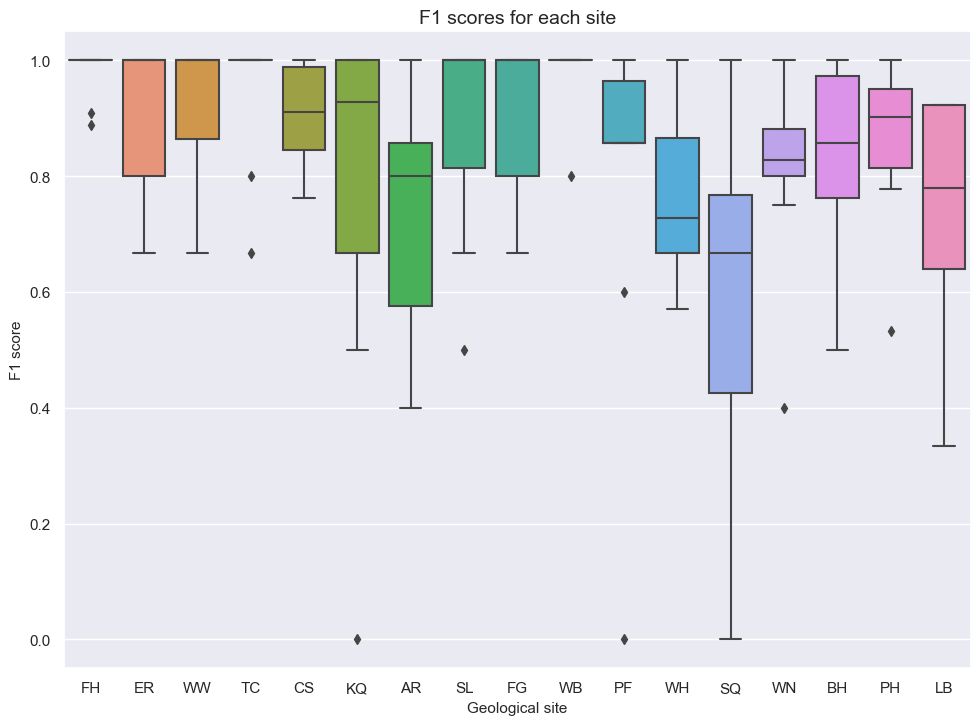

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.boxplot(data = f1_df_final.T)
plot.set_title('F1 scores for each site', fontdict={'fontsize': 14})
plot.set_ylabel('F1 score', fontdict={'fontsize': 11})
plot.set_xlabel("Geological site", fontdict={'fontsize': 11})

if save_plots:
    fig = plot.get_figure()
    fig.savefig('figures/site_specific_f1_scores.png')

In [17]:
if save_plots:
    pd.DataFrame(data = f1_df_final.T.median()).to_csv('figures/median_class_f1_scores.csv')

### Boxplot showing the macro F1 score

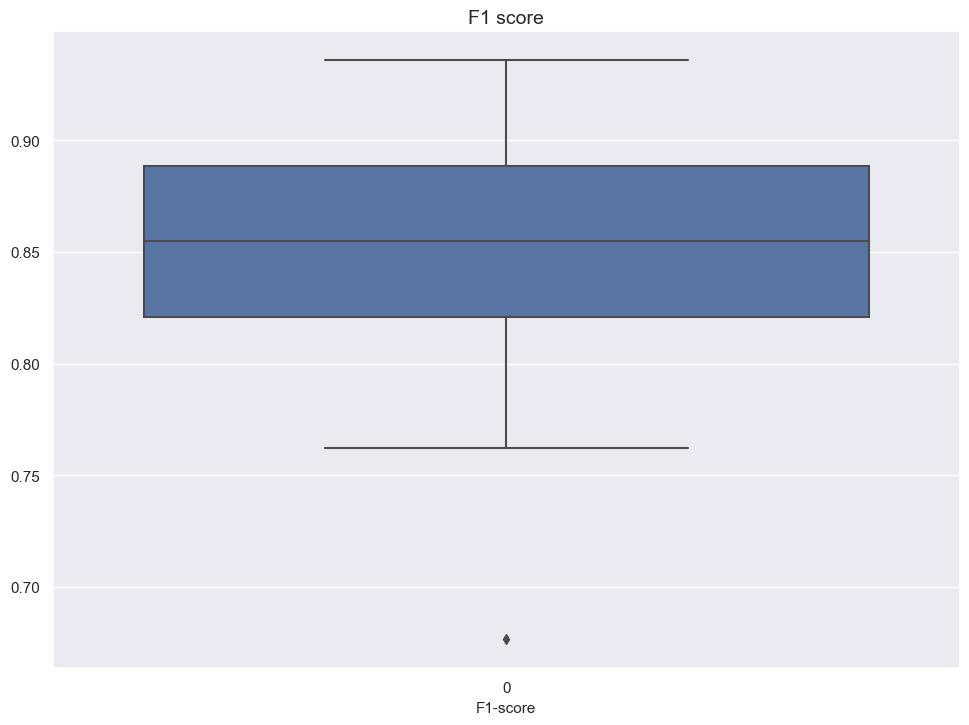

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.boxplot(my_model.macro_f1_scores)
plot.set_title('F1 score', fontdict={'fontsize': 14})
plot.set_xlabel("F1-score", fontdict={'fontsize': 11})

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig('figures/average-weighted f1_scores.png')

In [19]:
with open('output_datasets/macro_f1_scores', 'a') as f:
    for score in my_model.macro_f1_scores:
        f.write(str(score))
        f.write('\n')

In [20]:
if save_plots:
    pd.Series(pd.Series(my_model.macro_f1_scores).median()).to_csv('output_datasets//median_macro_f1.csv')

In [21]:
pd.Series(my_model.macro_f1_scores).median()

0.8550599560297247

### Boxplot showing accuracy scores

<AxesSubplot:>

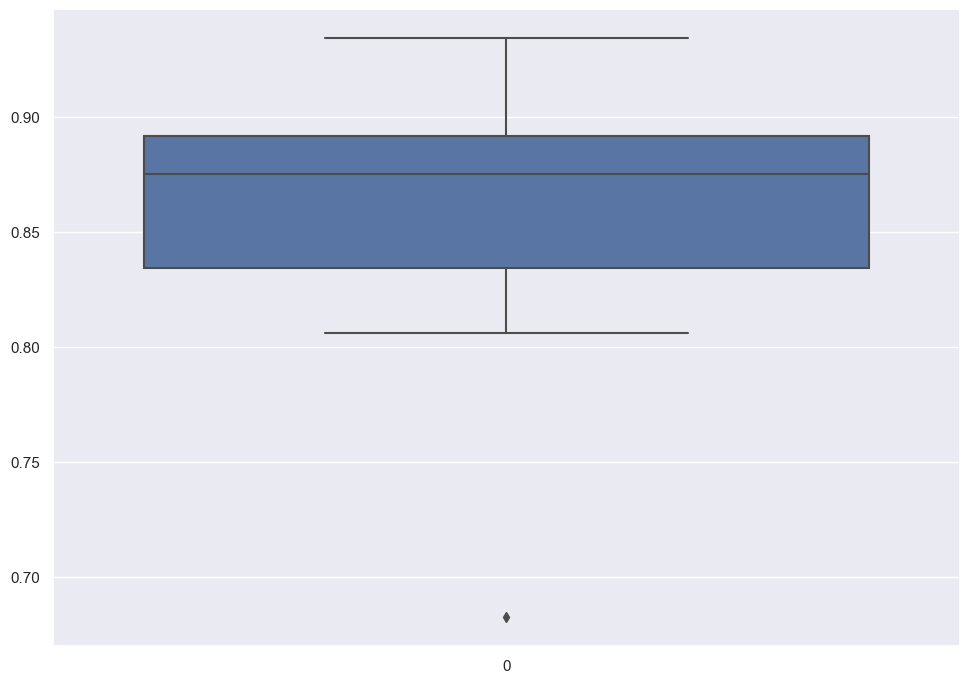

In [22]:
sns.boxplot(my_model.accuracy_scores)

### Get feature importances

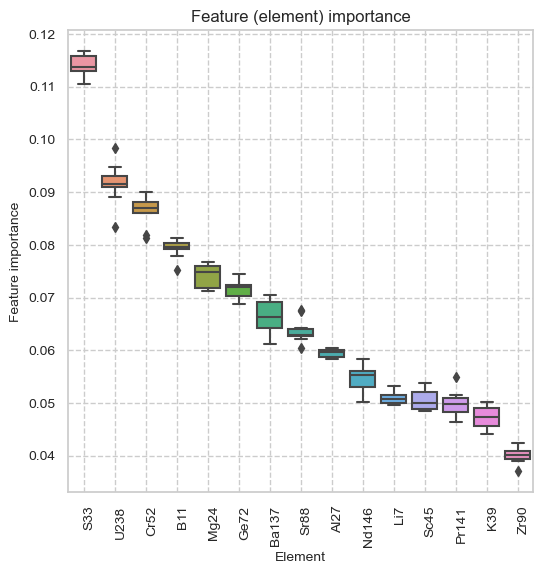

In [23]:
if my_model.model_name == 'rfc':

    dataForPlot = proccess_feature_importances(my_data, my_model.feat_imp_dict, best_feats)
 
    sns.set(rc={'figure.figsize':(6,6)})
    sns.set_style("whitegrid", {'grid.linestyle': 'dashed'})
    sns.set_style()   
    
    plot = sns.boxplot(data = dataForPlot)
    
    plot.xaxis.grid(True)
    plot.yaxis.grid(True)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90, ha = 'left')
    plot.set_title('Feature (element) importance', fontdict={'fontsize': 12})
    plot.set_ylabel('Feature importance', fontdict={'fontsize': 10})
    plot.set_xlabel("Element", fontdict={'fontsize': 10})
    plt.yticks(fontsize = 10)
    plt.xticks(fontsize = 10)
    dataForPlot.to_csv('output_datasets/feat_importances.csv')

    if save_plots:
        fig = plot.get_figure()
        fig.savefig('figures/feature_importances.eps')

In [24]:
if my_model.model_name == 'rfc':
    dataForPlot.to_csv('output_datasets/feature_importances.csv')

In [25]:
forPlot = proccess_f1_vs_sample_size(site_frequencies_df, f1_df_final)

In [26]:
forPlot.to_csv('output_datasets/score_vs_sample_number.csv')

AttributeError: 'PathCollection' object has no property 'ci'

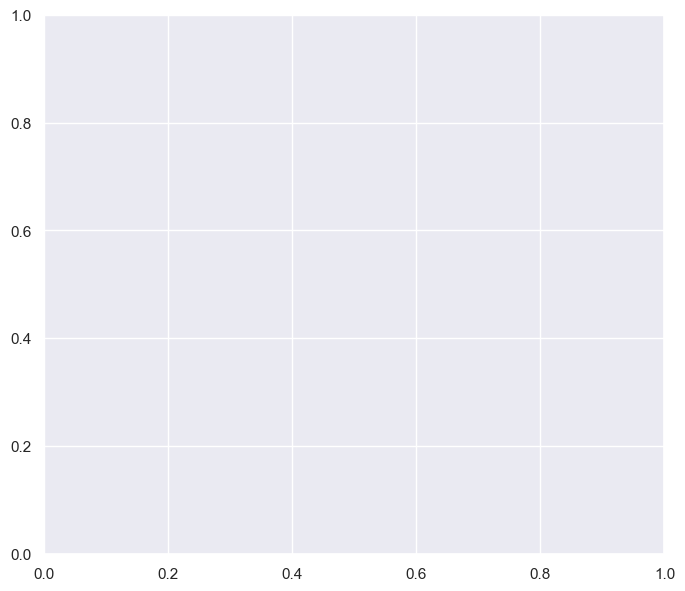

In [27]:
sns.set(rc={'figure.figsize':(8,7)})
plot = sns.scatterplot(x ='Number of Observations', y = 'Mean F1 Score', data = forPlot, ci=False)
ax = plt.gca()
ax.set_title("Mean F1 score vs number of observations for each class")
fig = plot.get_figure()
if save_plots:
    fig.savefig('figures/f1scoresvsnumberobservations{0}.png'.format(my_model.model_name))